In [1]:
# David No
# IST718
# Final Project
# EDA, Random Forest, and Keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import numpy as np
from matplotlib import dates
import matplotlib.ticker as ticker
from prophet import Prophet
#from datetime import date, time
import datetime

In [2]:
# import Seoul Bike dataset from my github
# make a copy with bikeOrig
bike = pd.read_csv('https://raw.githubusercontent.com/DavidNo100/IST718/main/SeoulBikeData.csv', encoding = 'latin1')
bikeOrig = bike.copy()

In [3]:
# look at dataset
bikeOrig

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [4]:
# format date to later make datetime
bike['Date'] = pd.to_datetime(bike['Date'], format='%d/%m/%Y')

In [5]:
# function to convert hour into time for making datetime
def int_to_time(i):
    if i < 60:
        return datetime.time(0, i)
    elif i < 1000:
        return datetime.time(int(str(i)[0]), int(str(i)[1:]))
    else:
        return datetime.time(int(str(i)[0:2]), int(str(i)[2:]))

In [6]:
# convert hour into time
bike['Time'] = (bike['Hour'] * 100).apply(int_to_time)

In [7]:
# verify data types as int
print (type(bike['Date'].iat[0]))
print (type(bike['Hour'].iat[0]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.int64'>


In [8]:
# convert date and time together to datetime
bike['DateTime'] = pd.to_datetime(bike.Date.astype(str) + ' ' + bike.Time.astype(str))

In [104]:
# check bike dataset
bike.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day      Time            DateTime     Day  
0             Yes  00:00:00 2017-12-01 00:00:00  Friday  
1             Yes  01:00:00 2017-12-01 01:00:00  Friday  
2             Yes  02:00:00 2017-12-01 02:00:00  Friday  
3             Yes  03:00:00 2017-12-01 03:00:00  Friday  
4             Yes  04:00:00 2017-12-01 04:00:00  Friday

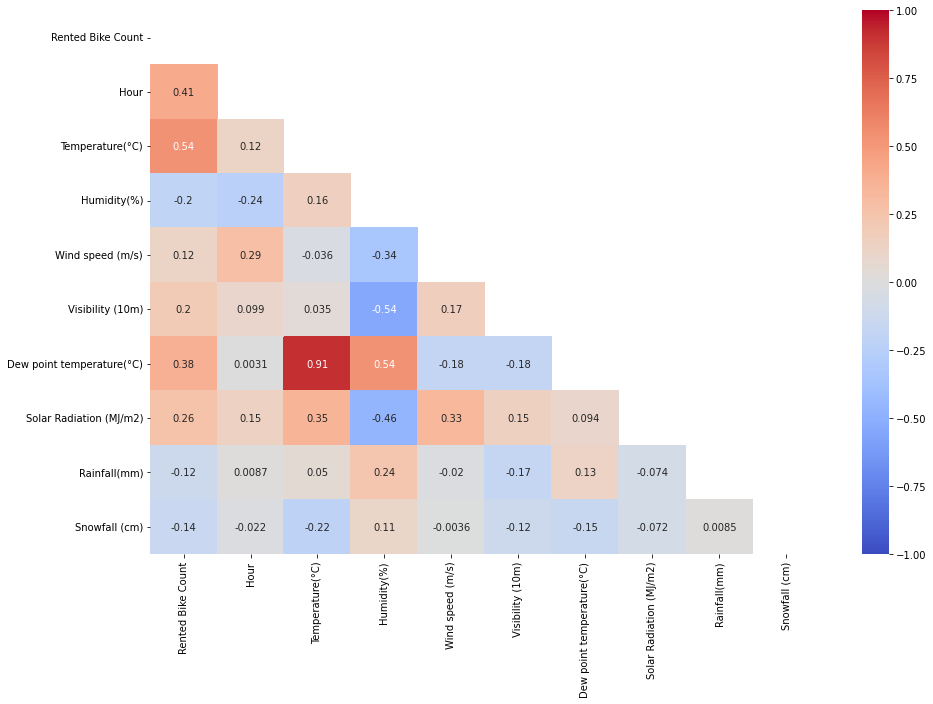

In [11]:
# Correlation Matrix of Bike Dataset
# need to make date and time into factor to incorporate
fig, ax = plt.subplots(figsize=(15, 10))
upp_mat = np.triu(bike.corr())
sns.heatmap(bike.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)

Hour and temperature may have correlation with Rented Bike Count

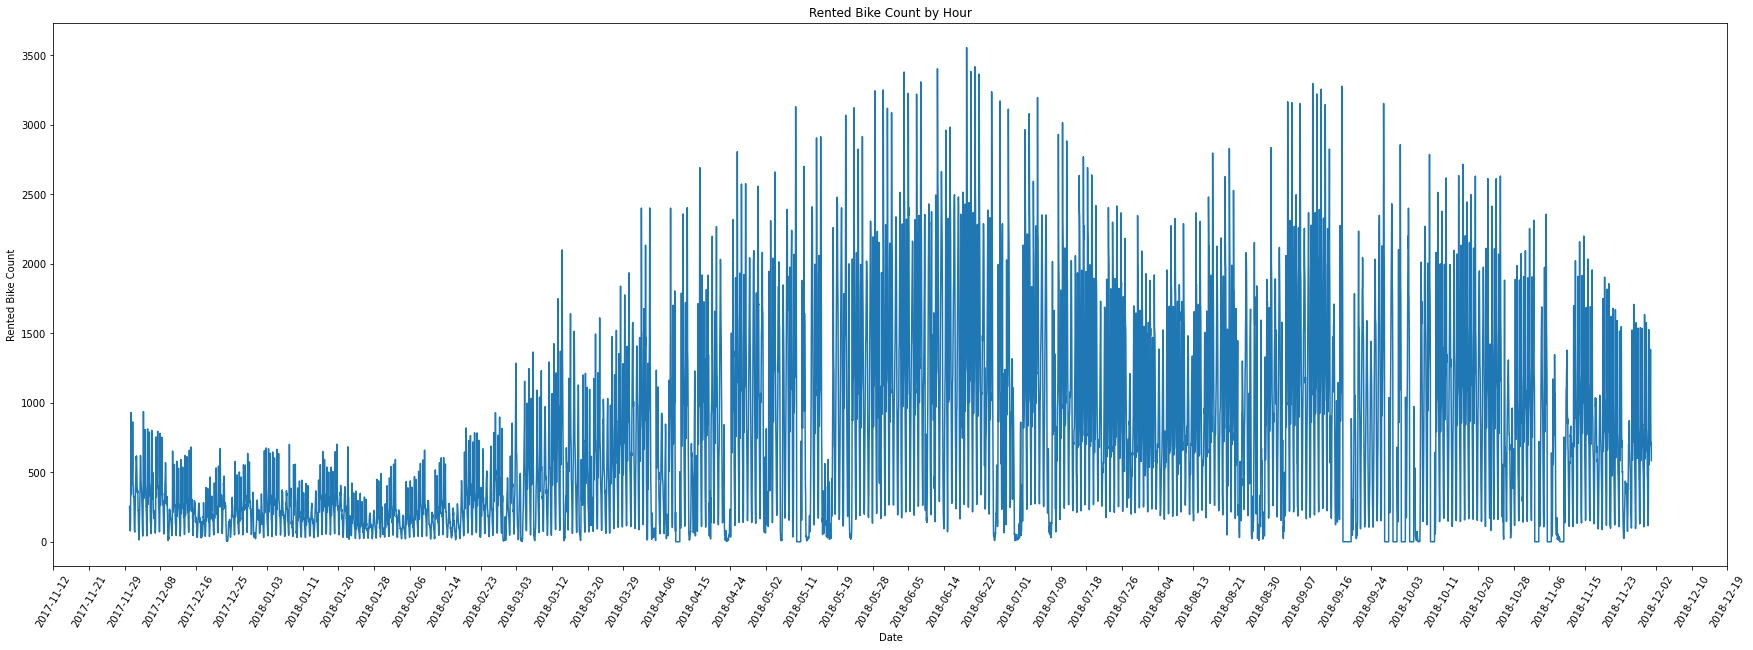

In [12]:
# Time series by hour
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.lineplot(x='DateTime', y='Rented Bike Count', data = bike, ax = ax)
g.xaxis.set_major_locator(ticker.LinearLocator(48))
plt.xticks(rotation=60)
ax.set(xlabel='Date',
       ylabel='Rented Bike Count',
       title='Rented Bike Count by Hour')
plt.show()

Rental bike counts are larger in summer months. Unfortunately too crowded.

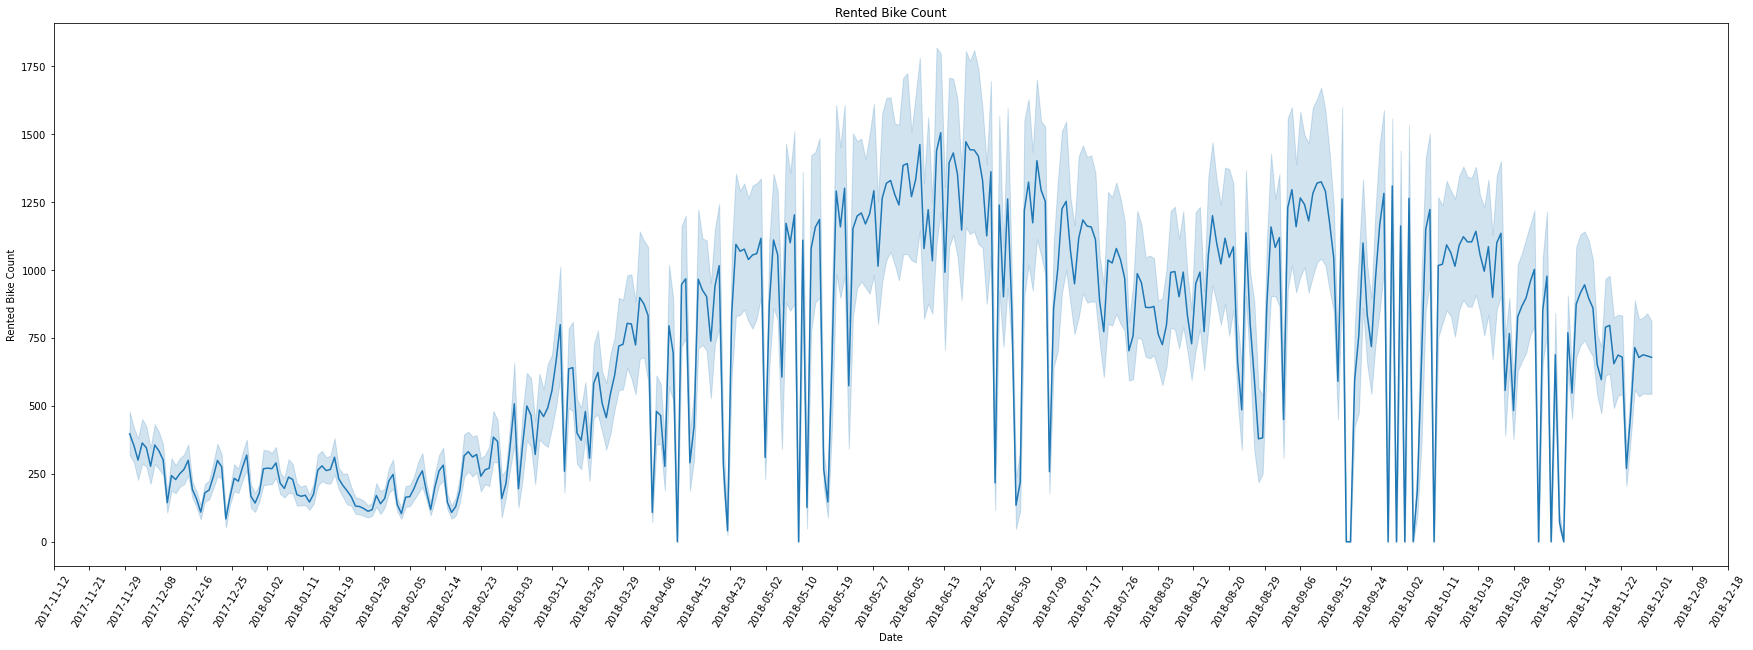

In [13]:
# time series by average daily bike usage
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.lineplot(x='Date', y='Rented Bike Count', data = bike, ax = ax)
g.xaxis.set_major_locator(ticker.LinearLocator(48))
plt.xticks(rotation=60)
ax.set(xlabel='Date',
       ylabel='Rented Bike Count',
       title='Rented Bike Count')
plt.show()

Daily average is better to see, less crowded. Several days have zero bike counts. Need to investigate if due to holiday or non functional.

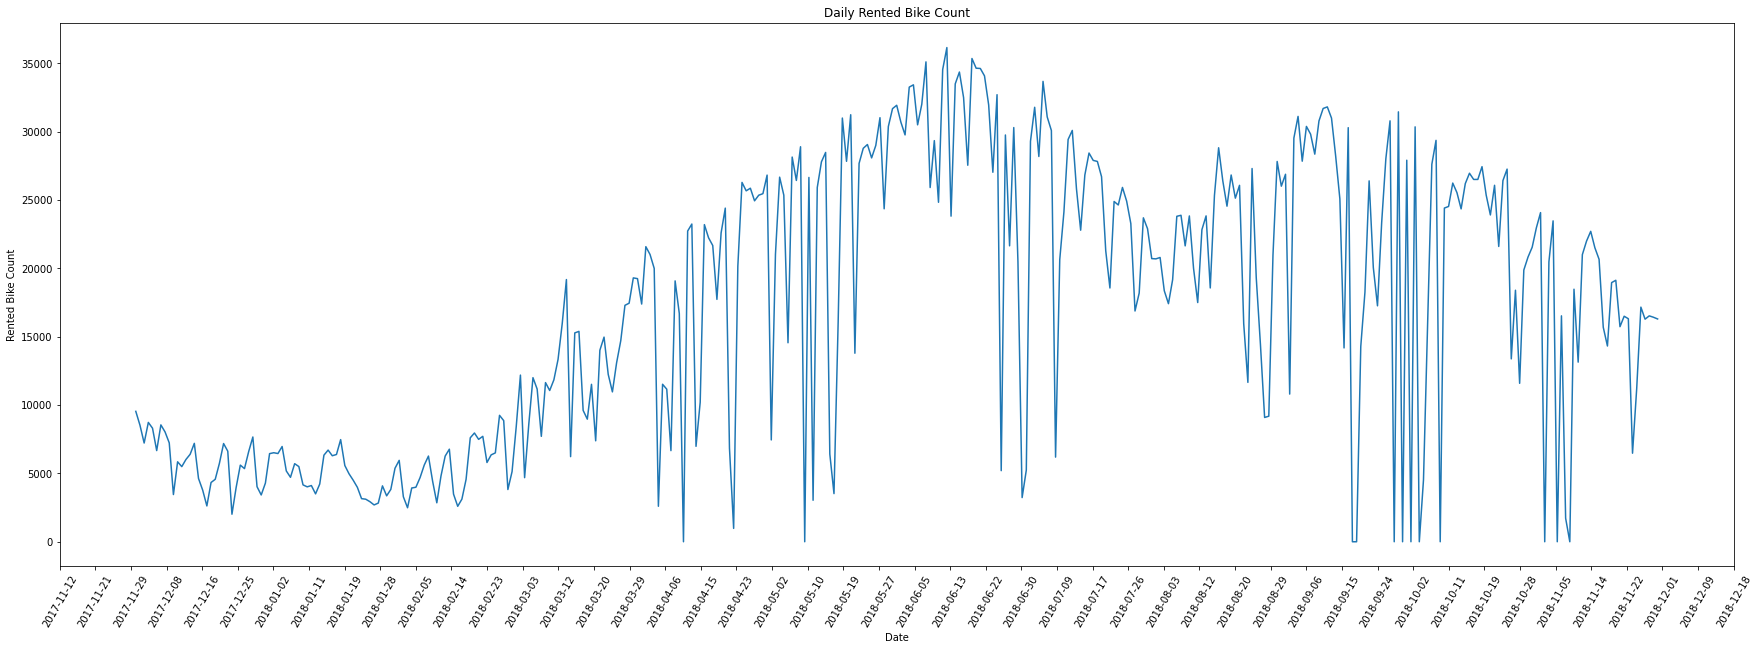

In [14]:
# time series with total daily bike usage
bike_group = bike.groupby(['Date'])['Rented Bike Count'].sum()

fig, ax = plt.subplots(figsize=(30, 10))
g = sns.lineplot(data = bike_group, ax = ax)
g.xaxis.set_major_locator(ticker.LinearLocator(48))
plt.xticks(rotation=60)
ax.set(xlabel='Date',
       ylabel='Rented Bike Count',
       title='Daily Rented Bike Count')
plt.show()

Total daily is similar to daily average graph.

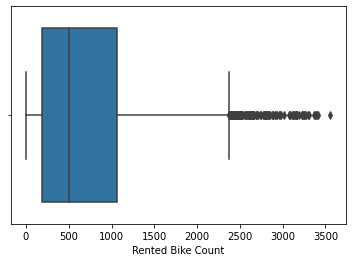

In [15]:
# boxplot of rented bike count
g = sns.boxplot(x = 'Rented Bike Count', data = bike)
plt.show()

Media is around 500 bikes with upper range at ~2400. Many outliers beyond till 3,500 bikes in an hour

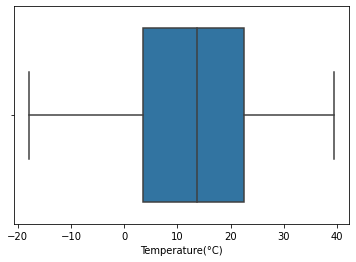

In [16]:
# boxplot of temperature
g = sns.boxplot(x = 'Temperature(°C)', data = bike)
plt.show()

Temperature from cold -20 C to hot 40 C. Median is around 15 C.

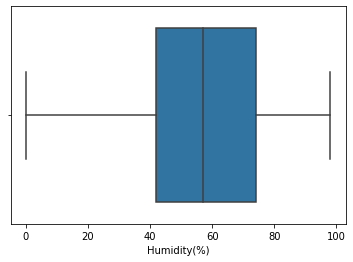

In [17]:
# boxplot of humidity
g = sns.boxplot(x = 'Humidity(%)', data = bike)
plt.show()

Humidity is around 55% for median. Fairly mild humidity.

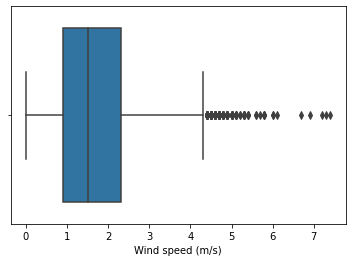

In [18]:
# boxplot of windspeed
g = sns.boxplot(x = 'Wind speed (m/s)', data = bike)
plt.show()

Windspeed shows not too windy for median.

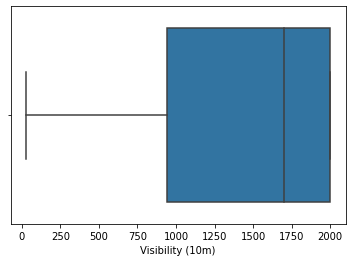

In [19]:
# boxplot of visibility
g = sns.boxplot(x = 'Visibility (10m)', data = bike)
plt.show()

Visibility remains high throughout the year

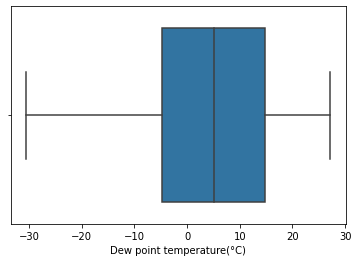

In [20]:
# boxplot of dew point temperature
g = sns.boxplot(x = 'Dew point temperature(°C)', data = bike)
plt.show()

Dewpoint median is 5 C, conformtable weather

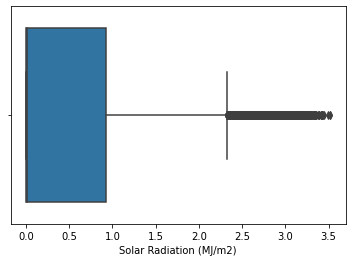

In [21]:
# boxplot of solar radiation
g = sns.boxplot(x = 'Solar Radiation (MJ/m2)', data = bike)
plt.show()

Solar radiation not too high throughout year.

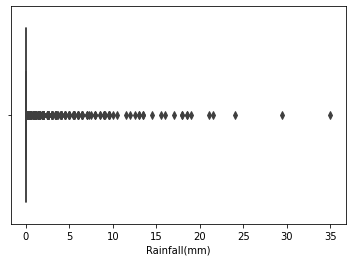

In [22]:
# boxplot of rainfall
g = sns.boxplot(x = 'Rainfall(mm)', data = bike)
plt.show()

Rainfall is minimal throughout year with outliers due to winter.

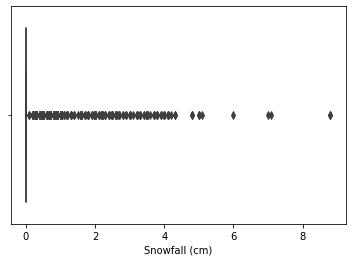

In [23]:
# boxplot of snowfall
g = sns.boxplot(x = 'Snowfall (cm)', data = bike)
plt.show()

Snowfall is up to 8 but otherwise snowfall doesn't seem to be an important factor yearly

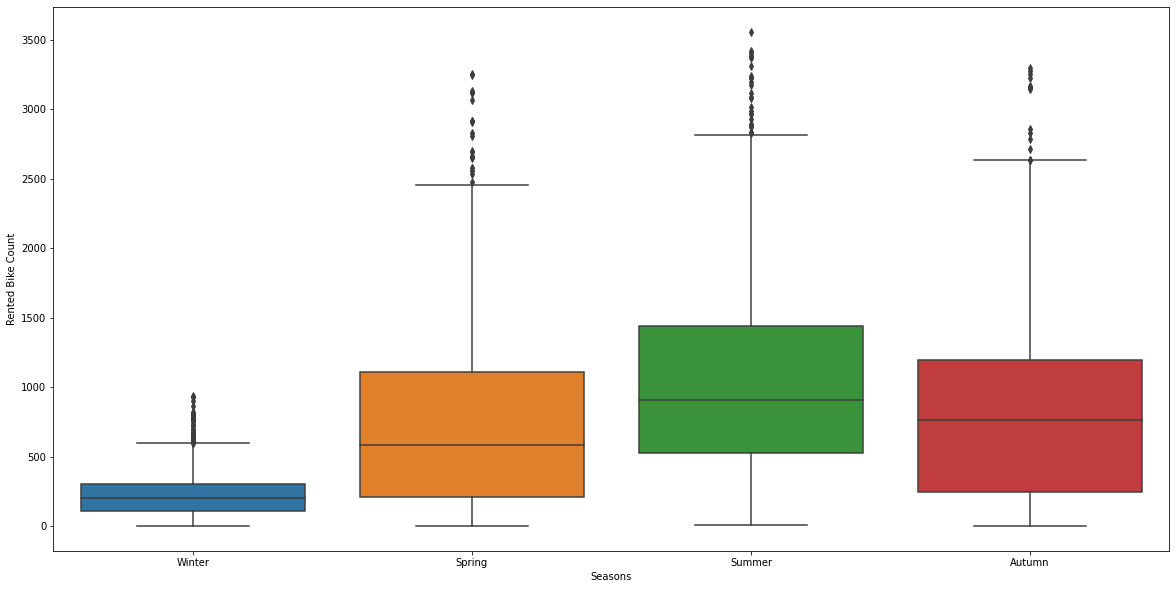

In [24]:
# seasons with rental bike count
fig, ax = plt.subplots(figsize=(20, 10))
g = sns.boxplot(x = 'Seasons', y = 'Rented Bike Count', data = bike, ax = ax)
plt.show()

Summer is season with most rental bike counts.

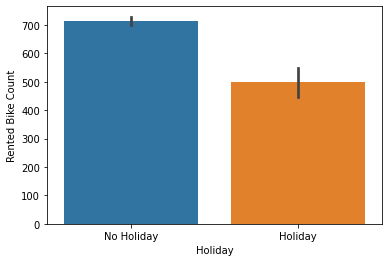

In [25]:
# holiday count
g = sns.barplot(x = 'Holiday', y = 'Rented Bike Count', data = bike)
plt.show()

Bike rentals are open during Holidays. The bar graph shows more bike rentals during non holidays than holidays.

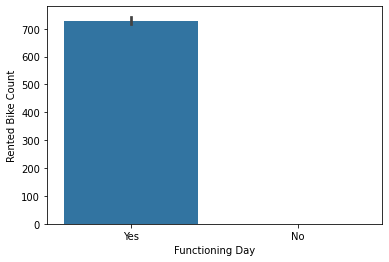

In [26]:
# non functional days
# no bike rented on non functional days
g = sns.barplot(x = 'Functioning Day', y = 'Rented Bike Count', data = bike)
plt.show()

Verified that nonfunctional days have no bike rentals

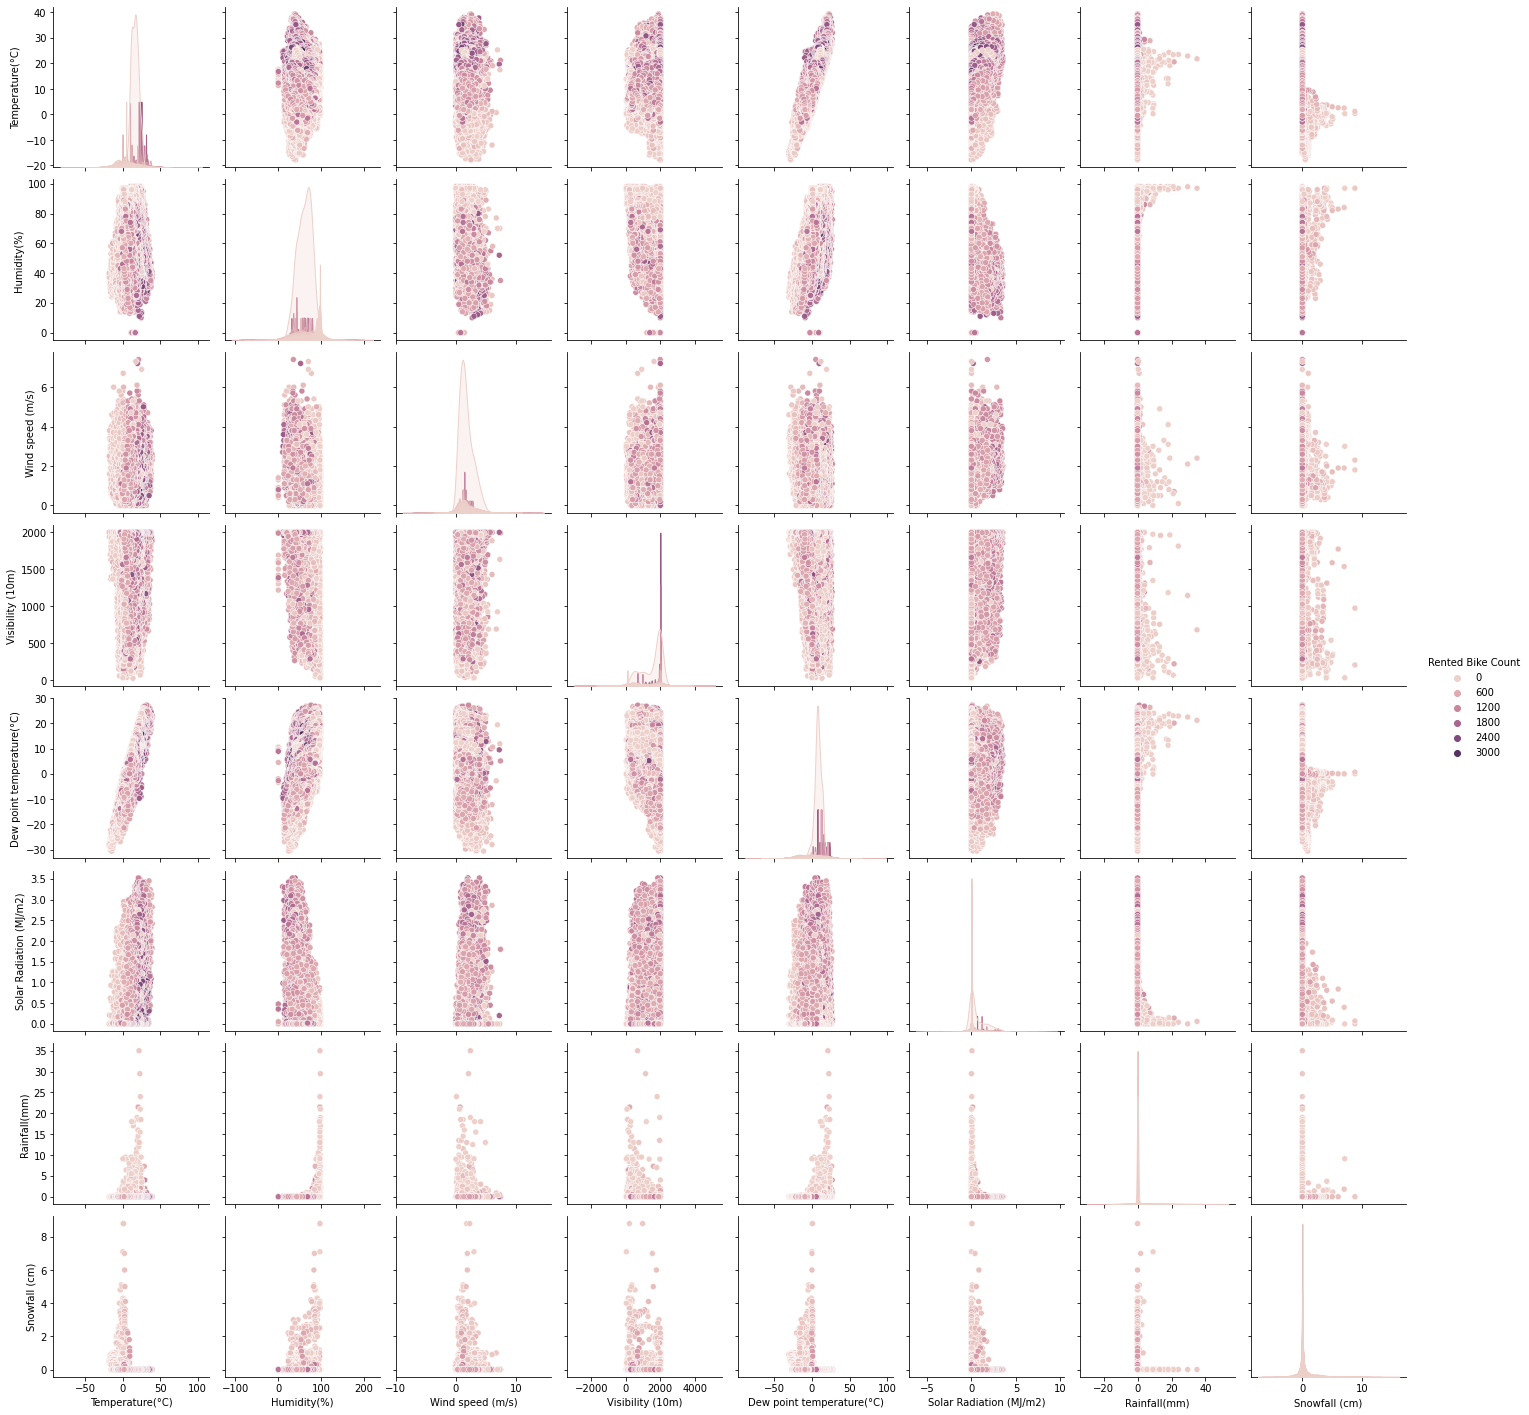

In [27]:
# pair plot with weather factors and rental bike counts
sns.pairplot(bike, vars=['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'], hue = 'Rented Bike Count')
plt.show()

Seems like temperature has higher bike rentals and temperature increases. Nothing else is apparent with pair wise plot

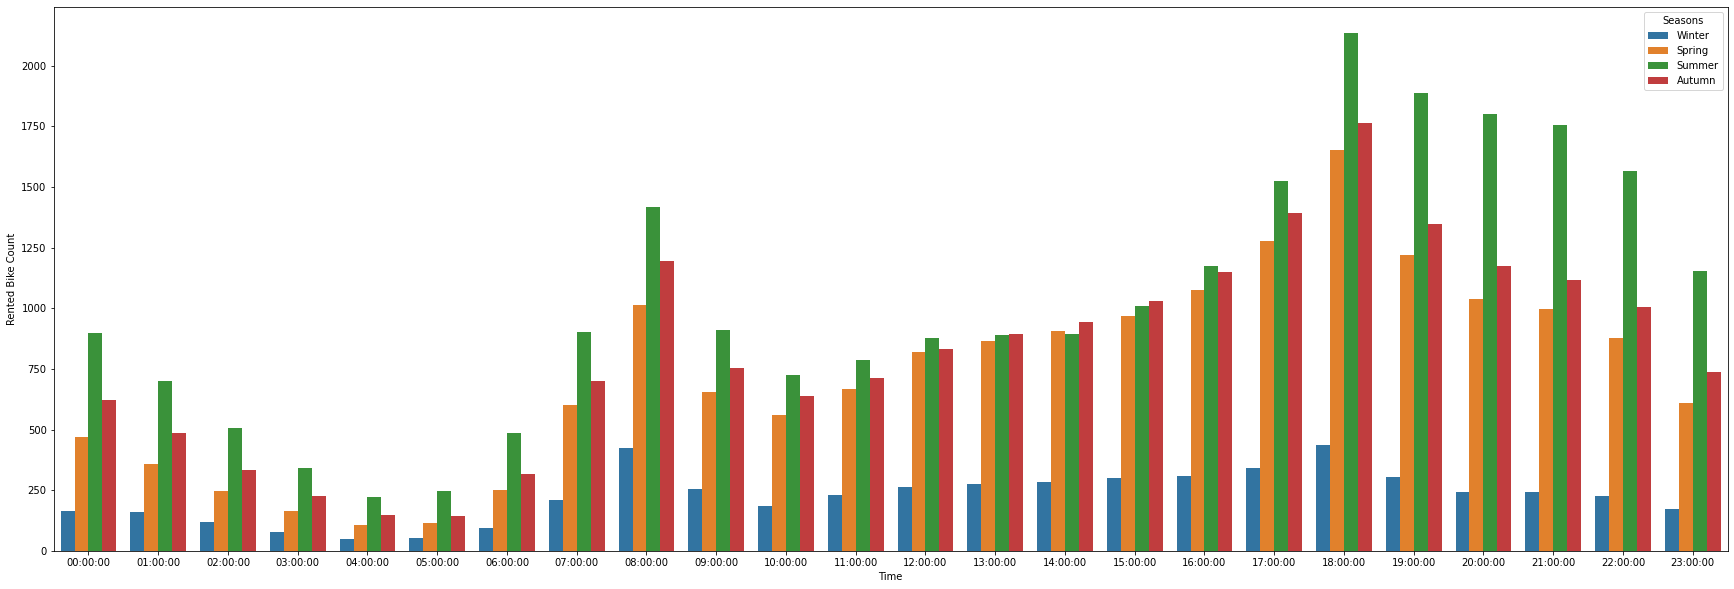

In [29]:
# barplot of hour and season
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.barplot(x = 'Time', y = 'Rented Bike Count', data = bike, ax = ax, hue = 'Seasons', ci = None)
#plt.xticks(rotation=60)
plt.show()

Winter remains stable usage throughout day. Every other season has spikes in morning and night, most likely due to commute to work and school.

In [30]:
# make new column with day from date
bike['Day'] = bike['Date'].dt.day_name()
bike

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day      Time            DateTime     Day  
0     No Holiday             Yes  00:00:00 2017-12-01 00:00:00  Friday  
1     No Holiday             Yes  01:00:00 2017-12-01 01:00:00  Friday  
2     No Holiday             Yes  02:00:00 2017-12-01 02:00:00  Friday  
3     No Holiday             Yes  03:00:00 2017-12-01 03:00:00  Friday  
4     No Holiday             Yes  04:00:00 2017-12-01 04:00:00  Friday  
...          ...             ...       ...                 ...     ...  
8755  No Holiday             Yes  19:00:00 2018-11-30 19:00:00  Friday  
8756  No Holiday             Yes  20:00:00 2018-11-30 20:00:00  Friday  
8757  No Holiday             Yes  21:00:00 2018-11-30 21:00:00  Friday  
8758  No Holiday             Yes  22:00:00 2018-11-30 22:00:00  Friday  
8759  No Holiday             Yes  23:00:00 2018-11-30 23:00:00  Friday  

[8760 rows x 17 columns]

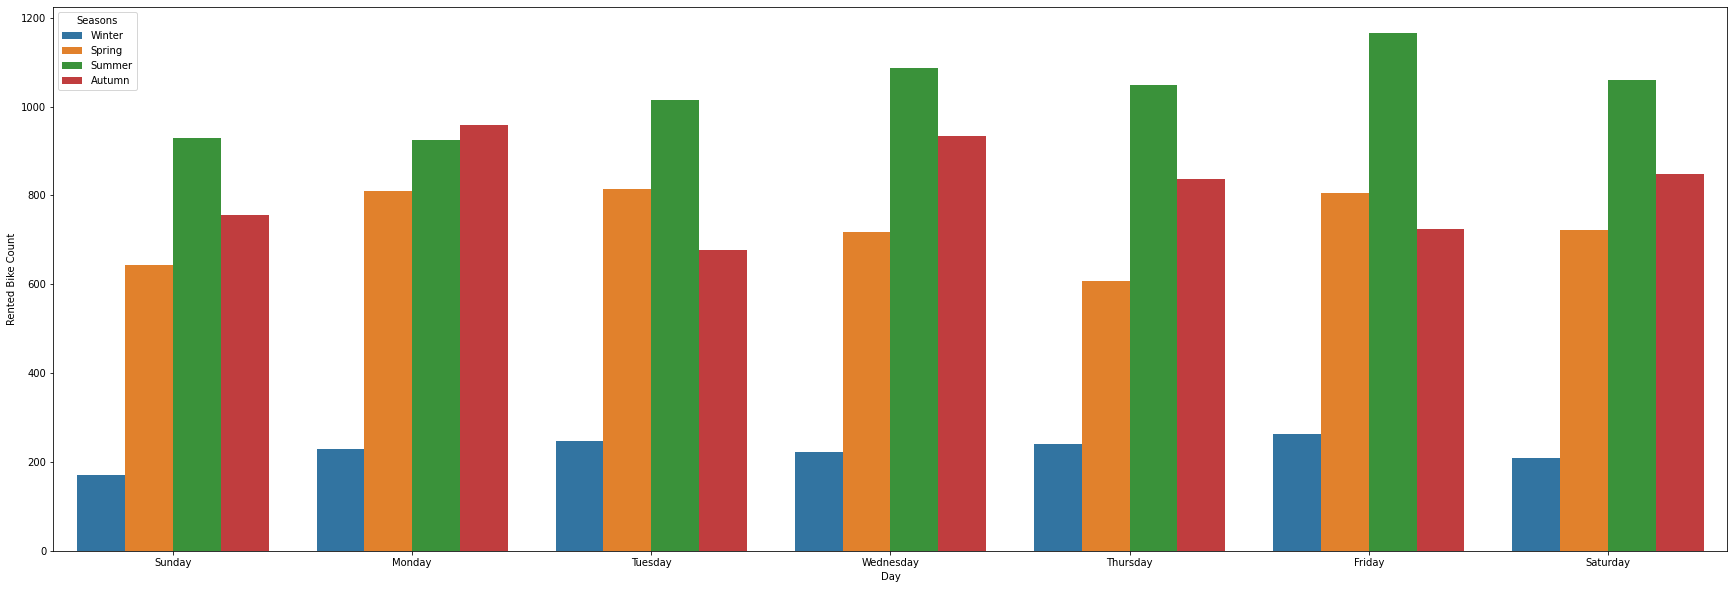

In [31]:
# barplot of days and season
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.barplot(x = 'Day', y = 'Rented Bike Count', data = bike, ax = ax, order = order, hue = 'Seasons', ci = None)
#plt.xticks(rotation=60)
plt.show()

Winter is stable throughout the week. Monday, Tuesday, and Friday are best for Spring, Friday is best day for Summer and Monday for Fall. May be due to work and school.

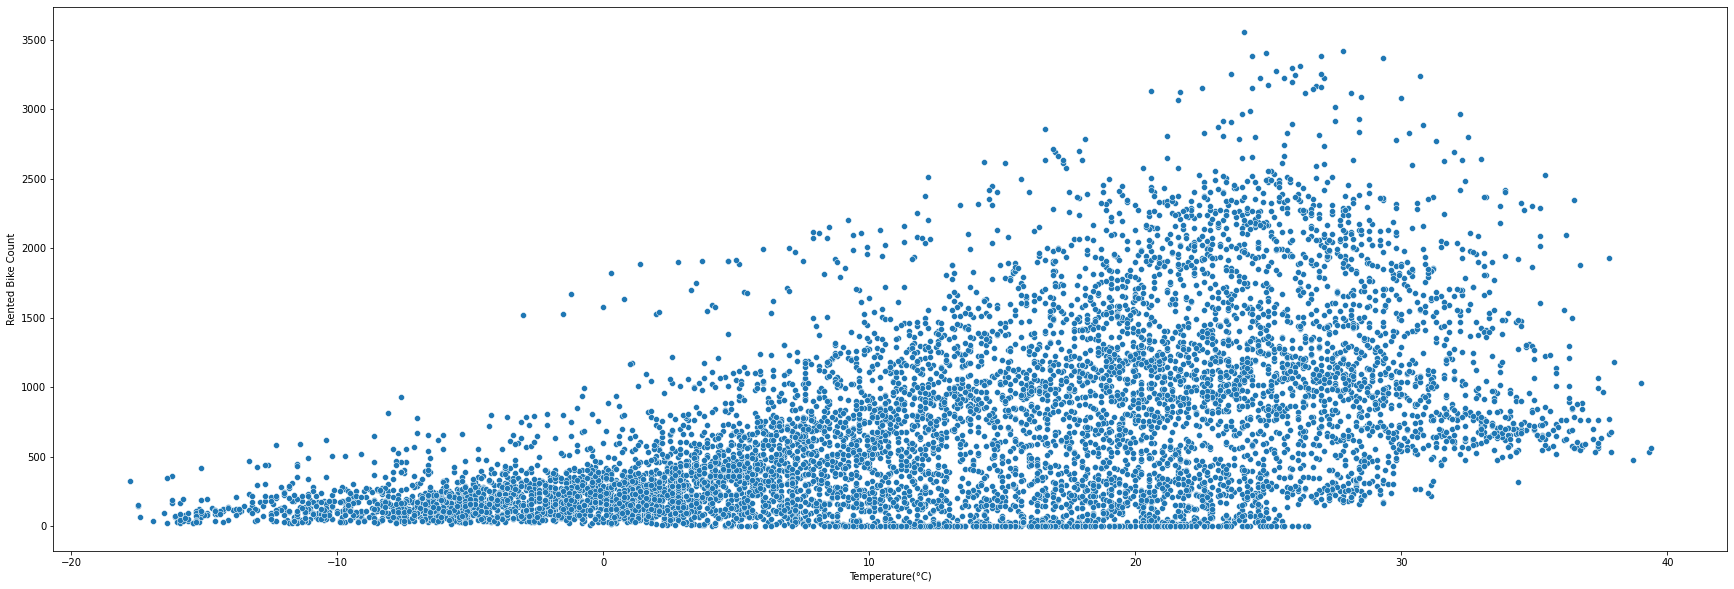

In [32]:
# scatterplot of temperature and rented bike count
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.scatterplot(x = 'Temperature(°C)', y = 'Rented Bike Count', data = bike, ax = ax)
#plt.xticks(rotation=60)
plt.show()

Possible linear relationship between temperature and bike count.

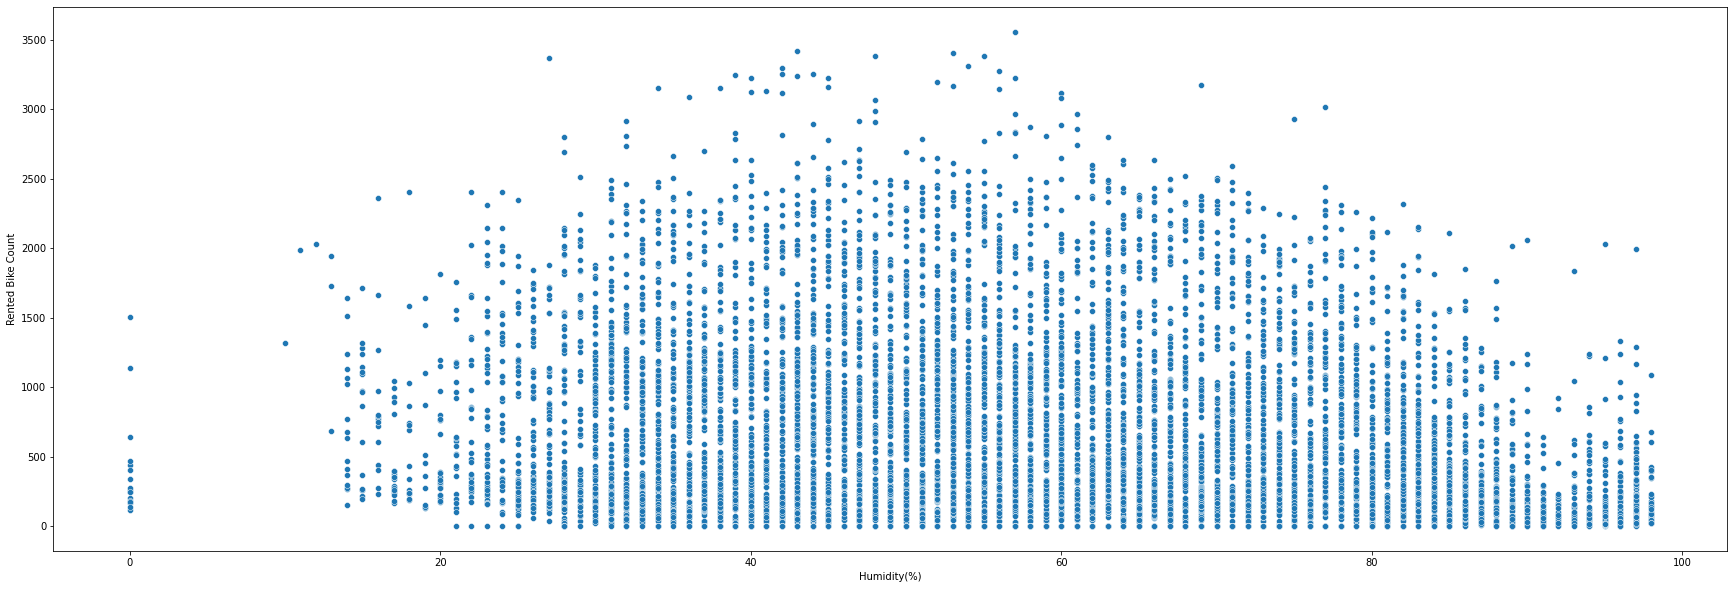

In [33]:
# scatterplot of humidity and rented bike count
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.scatterplot(x = 'Humidity(%)', y = 'Rented Bike Count', data = bike, ax = ax)
#plt.xticks(rotation=60)
plt.show()

nonlinear relationship between humidity and bike count

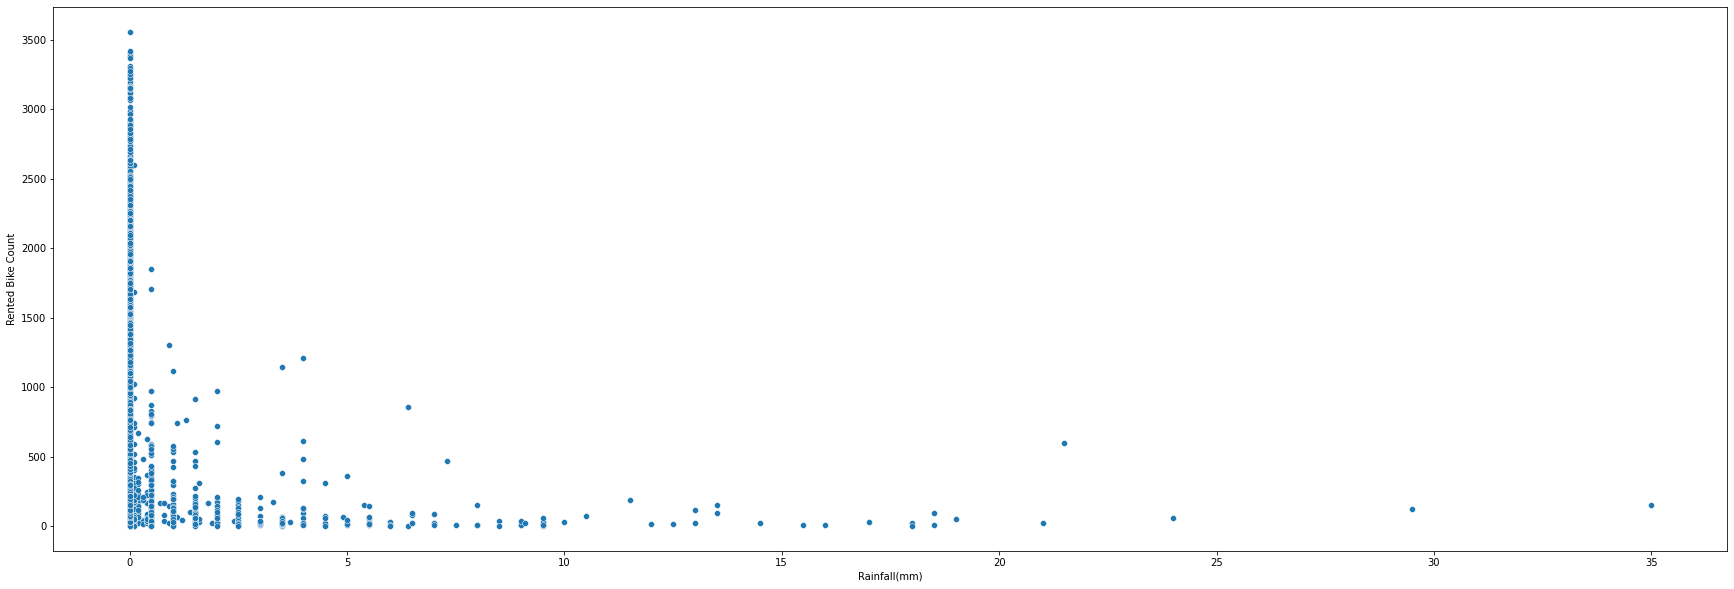

In [34]:
# scatterplot of rainfall
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.scatterplot(x = 'Rainfall(mm)', y = 'Rented Bike Count', data = bike, ax = ax)
#plt.xticks(rotation=60)
plt.show()

Most bike rentals during no rain.

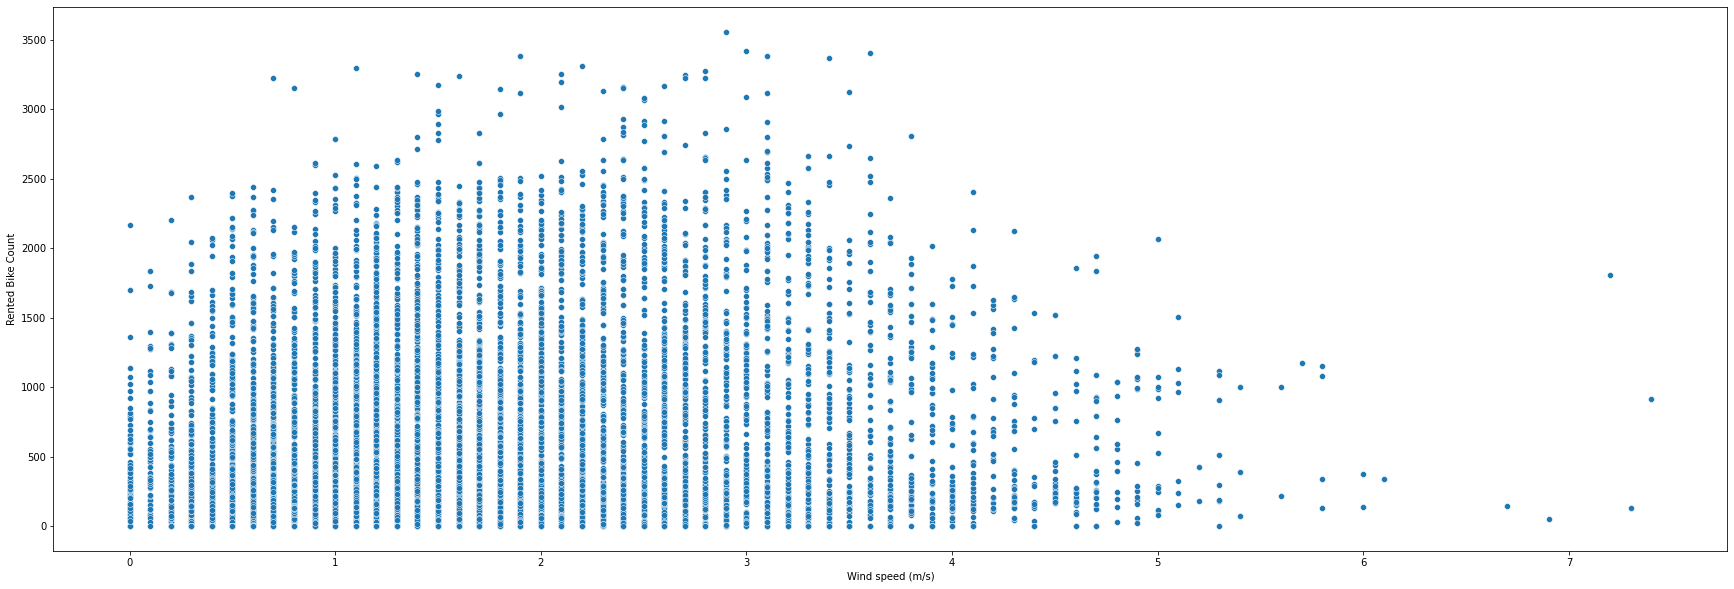

In [35]:
# scatterplot of wind speed
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.scatterplot(x = 'Wind speed (m/s)', y = 'Rented Bike Count', data = bike, ax = ax)
#plt.xticks(rotation=60)
plt.show()

Wind speed negatively affects bike usage when very windy.

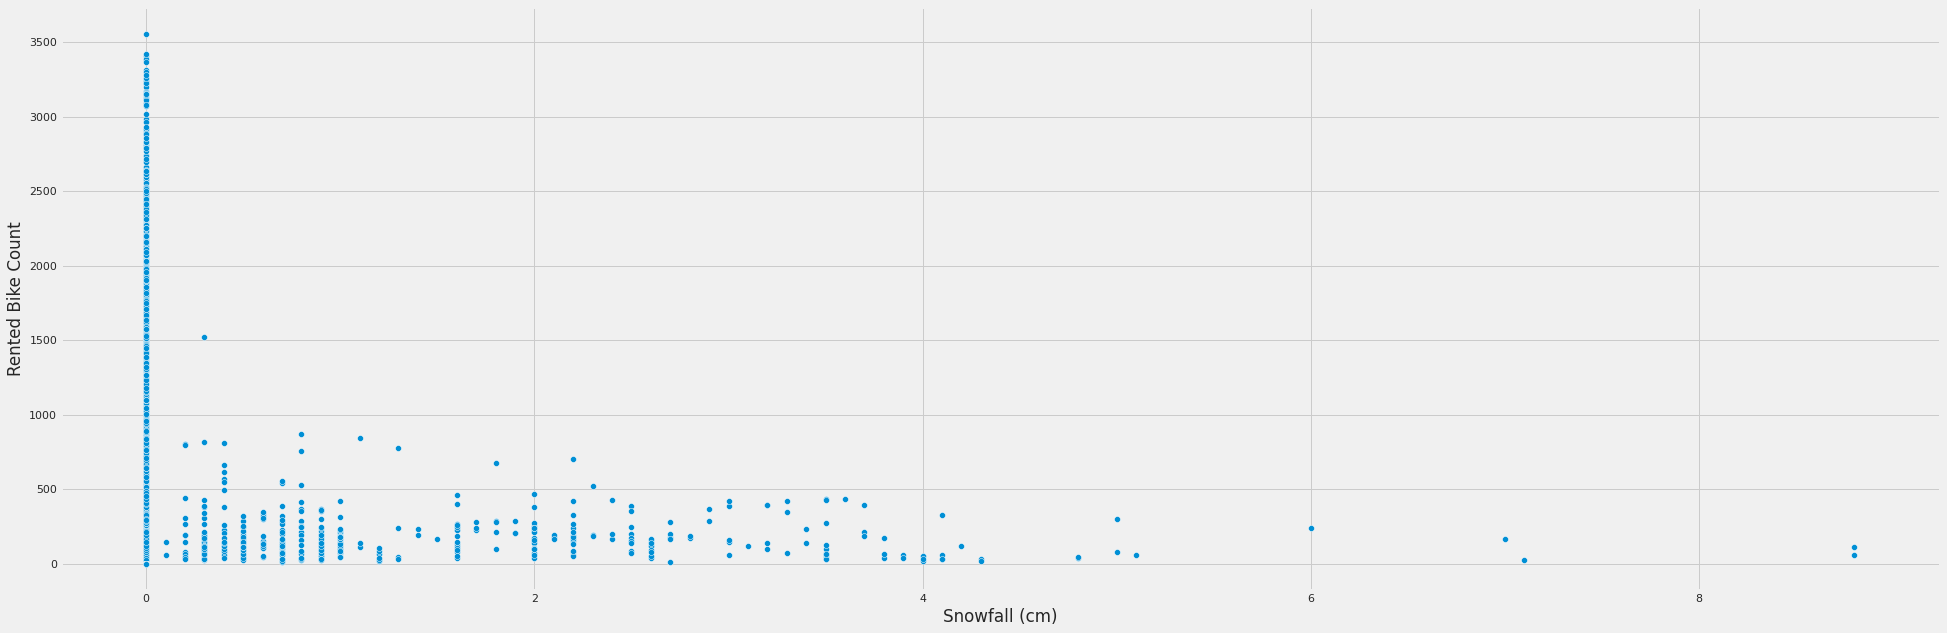

In [106]:
# scatterplot of snowfall
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.scatterplot(x = 'Snowfall (cm)', y = 'Rented Bike Count', data = bike, ax = ax)
#plt.xticks(rotation=60)
plt.show()

Like rainfall, no one rents bike during snowfall.

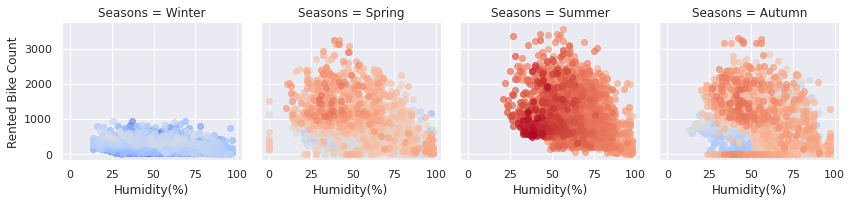

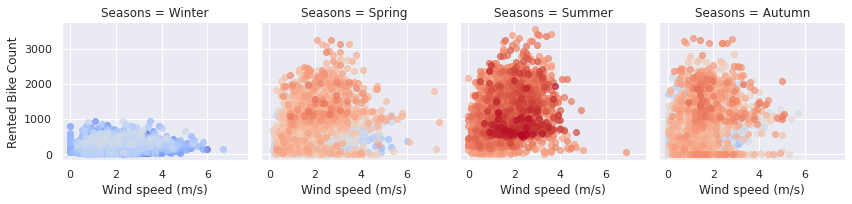

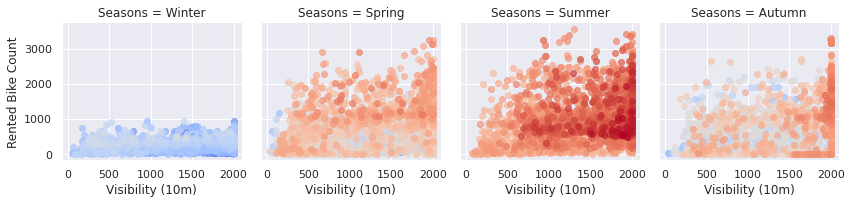

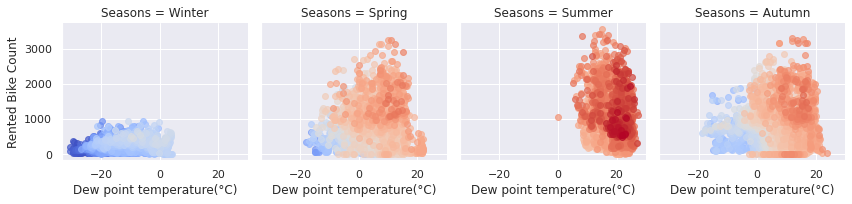

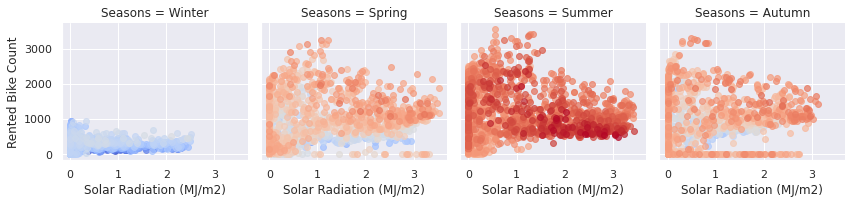

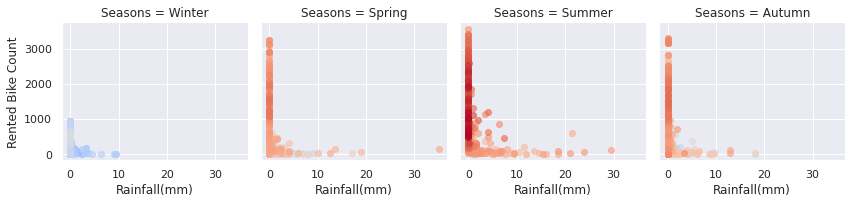

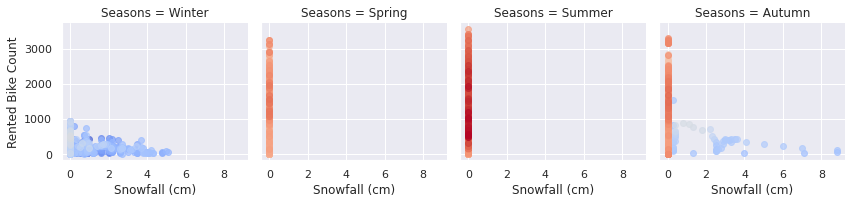

In [36]:
# facet plot of weather and rented bike count based on season
sns.set(style="darkgrid")
sns.color_palette("coolwarm", as_cmap=True)
# g = sns.FacetGrid(bike, col="Seasons")
# g.map(plt.scatter, "Temperature(°C)", "Rented Bike Count", alpha=.7)
# plt.show()

g = sns.FacetGrid(bike, col="Seasons", hue = "Temperature(°C)", palette = 'coolwarm')
g.map(plt.scatter, "Humidity(%)", "Rented Bike Count", alpha=.7)
# plt.show()

g = sns.FacetGrid(bike, col="Seasons", hue = "Temperature(°C)", palette = 'coolwarm')
g.map(plt.scatter, "Wind speed (m/s)", "Rented Bike Count", alpha=.7)
# plt.show()

g = sns.FacetGrid(bike, col="Seasons", hue = "Temperature(°C)", palette = 'coolwarm')
g.map(plt.scatter, "Visibility (10m)", "Rented Bike Count", alpha=.7)
# plt.show()

g = sns.FacetGrid(bike, col="Seasons", hue = "Temperature(°C)", palette = 'coolwarm')
g.map(plt.scatter, "Dew point temperature(°C)", "Rented Bike Count", alpha=.7)
# plt.show()

g = sns.FacetGrid(bike, col="Seasons", hue = "Temperature(°C)", palette = 'coolwarm')
g.map(plt.scatter, "Solar Radiation (MJ/m2)", "Rented Bike Count", alpha=.7)
# plt.show()

g = sns.FacetGrid(bike, col="Seasons", hue = "Temperature(°C)", palette = 'coolwarm')
g.map(plt.scatter, "Rainfall(mm)", "Rented Bike Count", alpha=.7)
# plt.show()

g = sns.FacetGrid(bike, col="Seasons", hue = "Temperature(°C)", palette = 'coolwarm')
g.map(plt.scatter, "Snowfall (cm)", "Rented Bike Count", alpha=.7)
plt.show()
# g = sns.FacetGrid(dodgers, col="day_night", hue="fireworks",
#                 hue_order=["YES", "NO"],)
# g.map(plt.scatter, "temp", "attend", alpha=.7)
# g.add_legend();
# sns.plt.show()

# g = sns.FacetGrid(dodgers, col="day_night", hue="bobblehead",
#                 hue_order=["YES", "NO"],)
# g.map(plt.scatter, "temp", "attend", alpha=.7)
# g.add_legend();
# sns.plt.show()

Bike usage seem to correlate with higher temperatures, average dew point of season, lower humidity, not windy, normal sunshine, no rain, and snow.

In [37]:
# make categorical columns into factors for modeling
bikeOrig['Day'] = bike['Date'].dt.day_name()
bikeOrig = bikeOrig.drop('Date', axis = 1)
categorical_columns =['Seasons','Holiday','Functioning Day', 'Day']

for column in categorical_columns:
     bikeOrig[column] = pd.factorize(bikeOrig[column])[0]

In [38]:
# check data for modeling
bikeOrig

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day  Day  
0              0.0            0.0        0        0                0    0  
1              0.0            0.0        0        0                0    0  
2              0.0            0.0        0        0                0    0  
3              0.0            0.0        0        0                0    0  
4              0.0            0.0        0        0                0    0  
...            ...            ...      ...      ...              ...  ...  
8755           0.0            0.0        3        0                0    0  
8756           0.0            0.0        3        0                0    0  
8757           0.0            0.0        3        0                0    0  
8758           0.0            0.0        3        0                0    0  
8759           0.0            0.0        3        0                0    0  

[8760 rows x 14 columns]

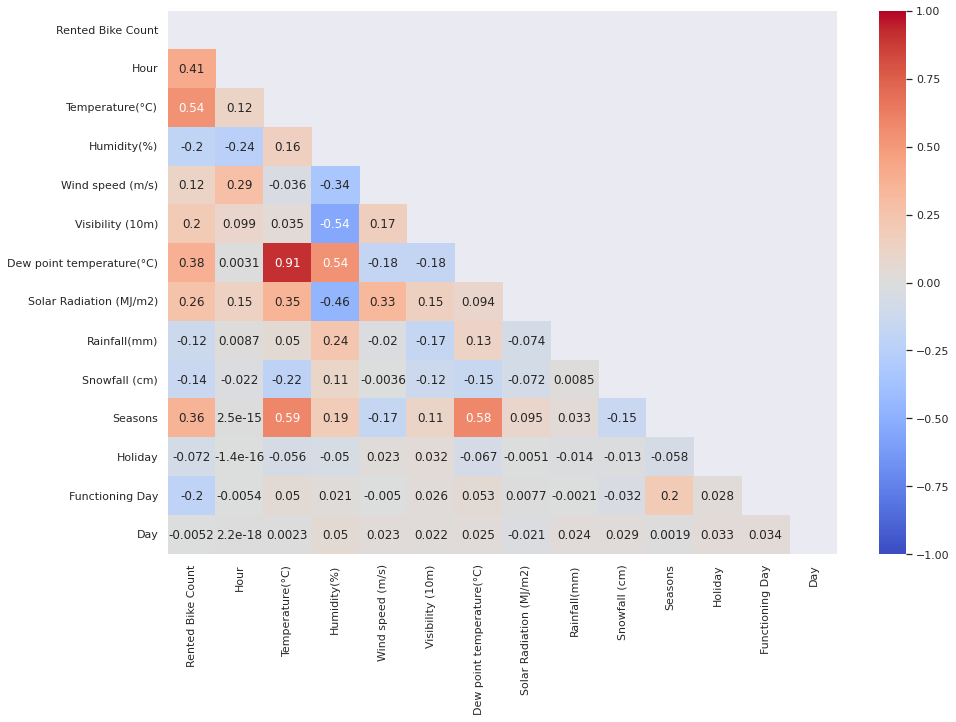

In [39]:
# Correlation matrix now with day and time as factors
fig, ax = plt.subplots(figsize=(15, 10))
upp_mat = np.triu(bikeOrig.corr())
sns.heatmap(bikeOrig.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)

Holiday, functional day, and day of week don't have strong correlation with rented bike count.

In [41]:
# Prophet to forecast 1 year
# first create new dataframe with only date (ds) and rental bike count (y)
bikeForecast = bike[['Date', 'Rented Bike Count']].copy()
bikeForecast.rename(columns = {'Date':'ds', 'Rented Bike Count': 'y'}, inplace = True)
bikeForecast = bikeForecast.groupby('ds', as_index = False).sum()

In [42]:
# check forecast
bikeForecast

ds      y
0   2017-12-01   9539
1   2017-12-02   8523
2   2017-12-03   7222
3   2017-12-04   8729
4   2017-12-05   8307
..         ...    ...
360 2018-11-26  17162
361 2018-11-27  16282
362 2018-11-28  16524
363 2018-11-29  16423
364 2018-11-30  16297

[365 rows x 2 columns]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt9_jbubw/6fyeyfw9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt9_jbubw/lxmeipqk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89213', 'data', 'file=/tmp/tmpt9_jbubw/6fyeyfw9.json', 'init=/tmp/tmpt9_jbubw/lxmeipqk.json', 'output', 'file=/tmp/tmp40sxcsmm/prophet_model-20220918232001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:20:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:20:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


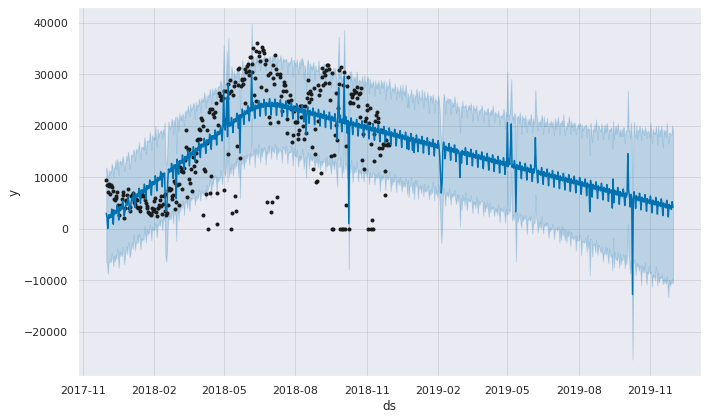

In [43]:
# Run prophet
# not enough data to make accurate forecast
bp = Prophet()
bp.add_country_holidays(country_name='KR')
bp.fit(bikeForecast)

future= bp.make_future_dataframe(periods = 365)
forecast = bp.predict(future)
fig1 = bp.plot(forecast)

Forecast with prophet is does not match with actual data. Need more years of data to make forecast. Otherwise forecast right now is downward trend. Also if forecast is further, need to take account of COVID-19 pandemic which will negatively affect rental bike counts due to quarrantine protocols.

In [44]:
# see last ten months of 2019 forecast
forecast.tail(10)

ds        trend    yhat_lower    yhat_upper  trend_lower  \
720 2019-11-21  4319.777098 -10636.800265  17967.233263 -7279.083781   
721 2019-11-22  4280.385631  -9266.210718  20560.771967 -7373.908613   
722 2019-11-23  4240.994164 -10859.272697  18321.450972 -7471.352037   
723 2019-11-24  4201.602697 -13253.172862  16510.739972 -7565.469359   
724 2019-11-25  4162.211230  -9977.116217  18666.648517 -7658.089807   
725 2019-11-26  4122.819763 -11085.419602  18606.979565 -7750.710255   
726 2019-11-27  4083.428296 -10141.351039  18284.975885 -7843.330703   
727 2019-11-28  4044.036829 -10719.168343  18226.845344 -7932.336783   
728 2019-11-29  4004.645362  -9720.019078  20006.564687 -8012.637051   
729 2019-11-30  3965.253895 -10519.178652  19199.306033 -8092.937319   

      trend_upper  Alternative holiday of Children's Day  \
720  15494.227257                                    0.0   
721  15469.920044                                    0.0   
722  15445.620460                                    0.0   
723  15421.320876                                    0.0   
724  15415.686019                                    0.0   
725  15426.932673                                    0.0   
726  15437.315521                                    0.0   
727  15450.924989                                    0.0   
728  15464.534457                                    0.0   
729  15478.143925                                    0.0   

     Alternative holiday of Children's Day_lower  \
720                                          0.0   
721                                          0.0   
722                                          0.0   
723                                          0.0   
724                                          0.0   
725                                          0.0   
726                                          0.0   
727                                          0.0   
728                                          0.0   
729                                          0.0   

     Alternative holiday of Children's Day_upper  \
720                                          0.0   
721                                          0.0   
722                                          0.0   
723                                          0.0   
724                                          0.0   
725                                          0.0   
726                                          0.0   
727                                          0.0   
728                                          0.0   
729                                          0.0   

     Alternative holiday of Chuseok  ...  holidays  holidays_lower  \
720                             0.0  ...       0.0             0.0   
721                             0.0  ...       0.0             0.0   
722                             0.0  ...       0.0             0.0   
723                             0.0  ...       0.0             0.0   
724                             0.0  ...       0.0             0.0   
725                             0.0  ...       0.0             0.0   
726                             0.0  ...       0.0             0.0   
727                             0.0  ...       0.0             0.0   
728                             0.0  ...       0.0             0.0   
729                             0.0  ...       0.0             0.0   

     holidays_upper       weekly  weekly_lower  weekly_upper  \
720             0.0  -284.467326   -284.467326   -284.467326   
721             0.0  1242.130938   1242.130938   1242.130938   
722             0.0   192.592345    192.592345    192.592345   
723             0.0 -1925.192610  -1925.192610  -1925.192610   
724             0.0   584.024740    584.024740    584.024740   
725             0.0  -196.389626   -196.389626   -196.389626   
726             0.0   387.301539    387.301539    387.301539   
727             0.0  -284.467326   -284.467326   -284.467326   
728             0.0  1242.130938   1242.130938   1242.130938   
7

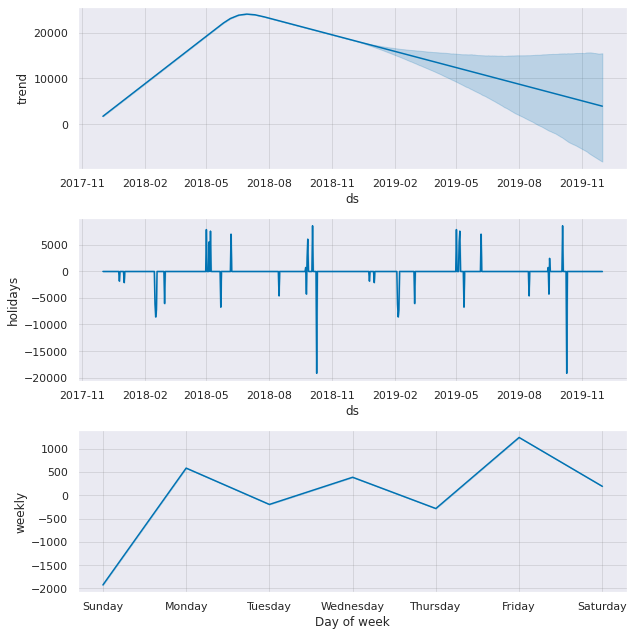

In [45]:
# components of prophet forecast
fig2 = bp.plot_components(forecast)

Friday is best day for rental bike

In [46]:
# random forest from https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
# convert to arrays
# labels are rented bike count
labels = np.array(bikeOrig['Rented Bike Count'])

# remove rented bike count from dataset to make features
features = bikeOrig.drop('Rented Bike Count', axis = 1)

# save attribute column names
feature_list = list(features.columns)

# convert to numpy array
features = np.array(features)

In [47]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [48]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

In [49]:
# Import the Random Forest model
# create model with 1,000 trees
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


In [50]:
%%time
# Train the model on training data
rf.fit(train_features, train_labels)

CPU times: user 32.5 s, sys: 337 ms, total: 32.8 s
Wall time: 33.8 s


RandomForestRegressor(n_estimators=1000, random_state=42)

In [51]:
# Use the forest's predict method on the training data
predictions2 = rf.predict(train_features)
# Calculate the absolute errors
errors2 = abs(predictions2 - train_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors2), 2), 'bikes.')

Mean Absolute Error: 41.14 bikes.


In [52]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'bikes.')

Mean Absolute Error: 115.95 bikes.


In [53]:
# get R squared
from sklearn.metrics import r2_score
r2_score(test_labels, predictions)

0.9020221929565376

R square of 0.90 is high. Processing took 33.8 seconds. Will test neural network with Keras and Tensorflow to see if MAE and R square improves along with time to process.

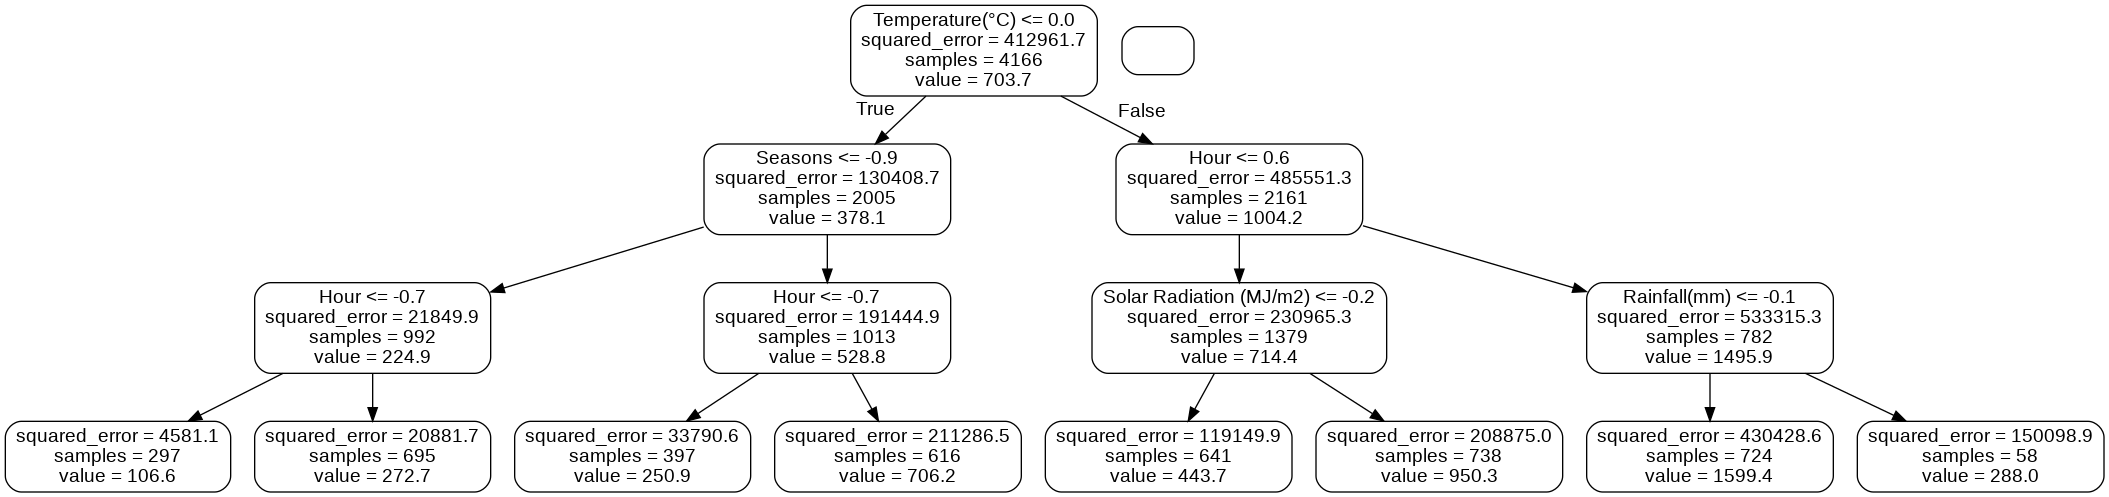

In [54]:
# image of truncated tree
import pydot
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

from IPython.display import Image
Image(filename = 'small_tree.png')

Temperature than season and time of day are on top of truncated random forest tree.

In [55]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Temperature(°C)      Importance: 0.3
Variable: Hour                 Importance: 0.29
Variable: Solar Radiation (MJ/m2) Importance: 0.09
Variable: Functioning Day      Importance: 0.09
Variable: Humidity(%)          Importance: 0.07
Variable: Rainfall(mm)         Importance: 0.04
Variable: Dew point temperature(°C) Importance: 0.03
Variable: Seasons              Importance: 0.03
Variable: Day                  Importance: 0.03
Variable: Wind speed (m/s)     Importance: 0.01
Variable: Visibility (10m)     Importance: 0.01
Variable: Snowfall (cm)        Importance: 0.0
Variable: Holiday              Importance: 0.0


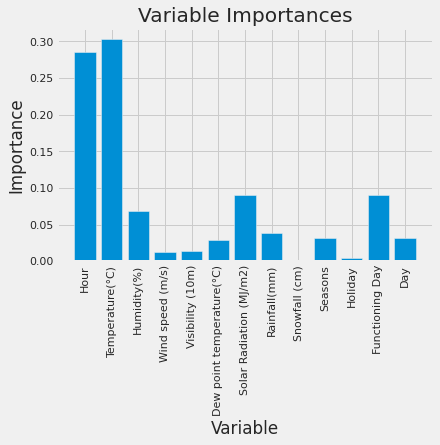

In [56]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Temperature and hour are important for random forest tree than other weather factors like sunshine and humidity. Non Functional day is always 0 bikes.

In [57]:
# hyperparameters for tuning of random forest
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [58]:
# fitting with tuning of hyperparameters of Random Forest
# rfRandom = RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator = rfRandom, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(train_features, train_labels)

In [59]:
# Use the forest's predict method on the test data
# # Mean Absolute Error: 116.04 bikes.
# predictions2 = rf_random.predict(test_features)
# # Calculate the absolute errors
# errors2 = abs(predictions2 - test_labels)
# # Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors2), 2), 'bikes.')

In [60]:
# R2 score not improved
# 0.9021621503059414
# r2_score(test_labels, predictions2)

In [61]:
# TensorFlow with Keras
# tutorial from https://www.tensorflow.org/tutorials/keras/regression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [62]:
# Normalize bike data
# normalizer = tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(np.array(train_features))
# normalizer.mean.numpy()

In [63]:
# build Keras model
# first layer is normalize
# two hidden layers of 64 neurons with ReLu
# one linear output layer
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [64]:
# # build Keras model
# # first layer is normalize
# # two hidden layers of 64 neurons with ReLu
# # one linear output layer
# def build_and_compile_model(norm):
#   model = keras.Sequential([
#       norm,
#       layers.Dense(64, activation='relu'),
#       layers.Dense(64, activation='relu'),
#       layers.Dense(1)
#   ])

#   model.compile(loss='mean_absolute_error',
#                 optimizer=tf.keras.optimizers.Adam(0.001))
#   return model

# kModel = build_and_compile_model(normalizer)

In [65]:
# Comiple Keras model
kModel = build_and_compile_model()


In [66]:
# fit Keras model with time recorded for processing
# 100 epochs
%%time
history = kModel.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 39.2 s, sys: 2.79 s, total: 42 s
Wall time: 34.2 s


In [67]:
# test Keras model
# output is mean absolute error
print(kModel.evaluate(train_features, train_labels, verbose=0))
print(kModel.evaluate(test_features, test_labels, verbose=0))

186.760009765625
195.51361083984375


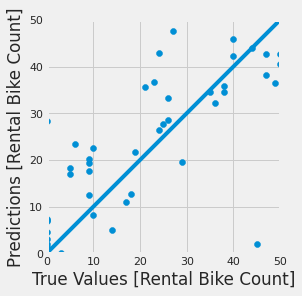

In [68]:
# visualize predictions with test results
# redo since limit to 50
# test_predictions = kModel.predict(test_features).flatten()
# a = plt.axes(aspect='equal')
# plt.scatter(test_labels, test_predictions)
# plt.xlabel('True Values [Rental Bike Count]')
# plt.ylabel('Predictions [Rental Bike Count]')
# lims = [0, 50]
# plt.xlim(lims)
# plt.ylim(lims)
# _ = plt.plot(lims, lims)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


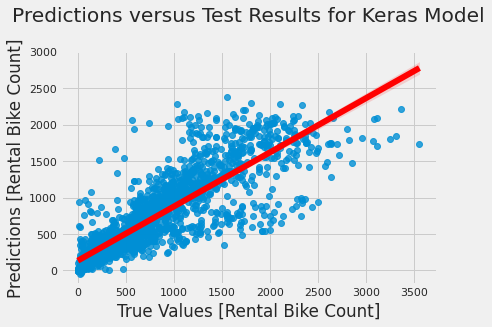

In [112]:
# test predictions for Keras model
test_predictions = kModel.predict(test_features).flatten()
sns.regplot(test_labels, test_predictions, line_kws = {'color': 'red'})
plt.xlabel('True Values [Rental Bike Count]')
plt.ylabel('Predictions [Rental Bike Count]')
plt.title('Predictions versus Test Results for Keras Model', y = 1.1)
plt.show()

In [69]:
# Rsquared for Keras model
# 0.7529517968018742
print(r2_score(test_labels, test_predictions))

0.7361699225221225


R squared is low at 0.73. Speed is comparable to Random Forest. Can improve with tuning of number of neurons and learning rate.

In [70]:
# tune Keras model with KerasTuner
!pip install keras-tuner
import keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 2.1 MB/s 
     |████████████████████████████████| 1.6 MB 15.6 MB/s 


In [71]:
# build Keras model with tuner
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32, 128, 256, 512]),
      activation='relu'))
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32, 128, 256, 512 ]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate))
  return model

In [72]:
# create Keras tuner with RandomSearch
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=50)

In [73]:
# Start search for best hyperparameters
tuner.search( train_features,
    train_labels, epochs=50, validation_data=(test_features, test_labels))

Trial 13 Complete [00h 01m 21s]
val_loss: 167.89535522460938

Best val_loss So Far: 103.81993865966797
Total elapsed time: 00h 11m 23s


In [74]:
# summary of search
# 512 layers is optimal with learning rate 0.01
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 512
learning_rate: 0.01
Score: 103.81993865966797
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.01
Score: 136.91986083984375
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.01
Score: 158.72080993652344
Trial summary
Hyperparameters:
units: 512
learning_rate: 0.001
Score: 167.89535522460938
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.001
Score: 184.16781616210938
Trial summary
Hyperparameters:
units: 16
learning_rate: 0.01
Score: 184.58609008789062
Trial summary
Hyperparameters:
units: 8
learning_rate: 0.01
Score: 216.7544708251953
Trial summary
Hyperparameters:
units: 512
learning_rate: 0.0001
Score: 227.0204315185547
Trial summary
Hyperparameters:
units: 256
learning_rate: 0.0001
Score: 244.8948974609375
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.0001
Score: 257.5465087890625


In [75]:
# create new Keras model with hyperparameters
best_hps=tuner.get_best_hyperparameters()[0]
hypermodel = tuner.hypermodel.build(best_hps)

In [76]:
%%time
history = hypermodel.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 2min 33s, sys: 9.9 s, total: 2min 43s
Wall time: 2min 6s


In [77]:
# summary of hypermodel
hypermodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               7168      
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 270,337
Trainable params: 270,337
Non-trainable params: 0
_________________________________________________________________


In [78]:
# test Keras model
# output is mean absolute error
print(hypermodel.evaluate(train_features, train_labels, verbose=0))
print(hypermodel.evaluate(test_features, test_labels, verbose=0))

78.81749725341797
107.97530364990234


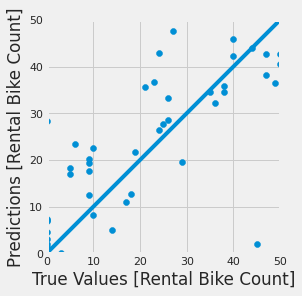

In [79]:
# visualize predictions with test results
# limited to only 50, above graph is entire test set
# test_predictions2 = hypermodel.predict(test_features).flatten()
# a = plt.axes(aspect='equal')
# z = np.polyfit(test_labels, test_predictions2, 1)
# p = np.poly1d(z)
# plt.scatter(test_labels, test_predictions2)
# plt.plot(plt.plot(test_predictions, p(test_predictions2))))
# plt.xlabel('True Values [Rental Bike Count]')
# plt.ylabel('Predictions [Rental Bike Count]')
# # lims = [0, 50]
# # plt.xlim(lims)
# # plt.ylim(lims)
# # _ = plt.plot(lims, lims)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


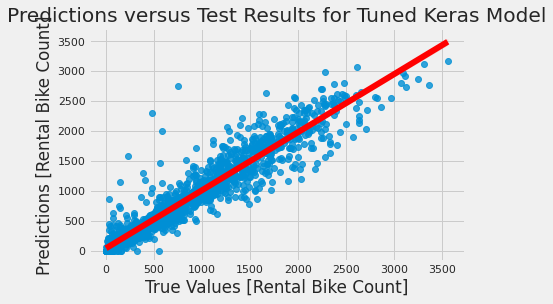

In [107]:
# plot of tuned Keras predictions with test results
test_predictions2 = hypermodel.predict(test_features).flatten()
sns.regplot(test_labels, test_predictions2, line_kws = {'color': 'red'})
plt.xlabel('True Values [Rental Bike Count]')
plt.ylabel('Predictions [Rental Bike Count]')
plt.title('Predictions versus Test Results for Tuned Keras Model')
plt.show()

In [80]:
# Rsquared for Keras model
# 0.7529517968018742
r2_score(test_labels, test_predictions2)

0.9140507289447423

Tuned Keras model is much more linear at 0.91 R-squared. However time to process was 2 minutes compared to Random Forest at 33 seconds. Random Forest is adequate enough for prediction of rental bike counts. Higher accuracy of Keras model came at cost of processing speed. Tuned Keras would be more worthwile if R squared was much higher than Random Forest.

In [82]:
# create new dataframe with only holidays
holidayBike = bike.loc[bike['Holiday'] == 'Holiday']

In [83]:
# holiday bike dataset
holidayBike

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
504  2017-12-22                196     0             -1.7           79   
505  2017-12-22                250     1             -1.6           79   
506  2017-12-22                161     2             -1.1           79   
507  2017-12-22                 99     3             -0.6           76   
508  2017-12-22                 64     4             -0.3           76   
...         ...                ...   ...              ...          ...   
7507 2018-10-09                  0    19             17.3           47   
7508 2018-10-09                  0    20             17.0           49   
7509 2018-10-09                  0    21             16.8           52   
7510 2018-10-09                  0    22             16.7           55   
7511 2018-10-09                  0    23             16.6           53   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
504                0.5               794                       -4.8   
505                0.6               784                       -4.7   
506                0.7               736                       -4.2   
507                0.5               789                       -4.3   
508                0.9               760                       -4.0   
...                ...               ...                        ...   
7507               2.2              2000                        5.8   
7508               1.4              2000                        6.1   
7509               1.6              2000                        6.8   
7510               1.9              2000                        7.6   
7511               1.1              2000                        6.9   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  Holiday  \
504                       0.0           0.0            0.8  Winter  Holiday   
505                       0.0           0.0            0.8  Winter  Holiday   
506                       0.0           0.0            0.8  Winter  Holiday   
507                       0.0           0.0            0.7  Winter  Holiday   
508                       0.0           0.0            0.7  Winter  Holiday   
...                       ...           ...            ...     ...      ...   
7507                      0.0           0.0            0.0  Autumn  Holiday   
7508                      0.0           0.0            0.0  Autumn  Holiday   
7509                      0.0           0.0            0.0  Autumn  Holiday   
7510                      0.0           0.0            0.0  Autumn  Holiday   
7511                      0.0           0.0            0.0  Autumn  Holiday   

     Functioning Day      Time            DateTime      Day  
504              Yes  00:00:00 2017-12-22 00:00:00   Friday  
505              Yes  01:00:00 2017-12-22 01:00:00   Friday  
506              Yes  02:00:00 2017-12-22 02:00:00   Friday  
507              Yes  03:00:00 2017-12-22 03:00:00   Friday  
508              Yes  04:00:00 2017-12-22 04:00:00   Friday  
...              ...       ...                 ...      ...  
7507              No  19:00:00 2018-10-09 19:00:00  Tuesday  
7508              No  20:00:00 2018-10-09 20:00:00  Tuesday  
7509              No  21:00:00 2018-10-09 21:00:00  Tuesday  
7510              No  22:00:00 2018-10-09 22:00:00  Tuesday  
7511              No  23:00:00 2018-10-09 23:00:00  Tuesday  

[432 rows x 17 columns]

In [84]:
# convert datetime to just date
holidayBike['Date'] = holidayBike.Date.dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
# print all unique holiday dates
print(holidayBike['Date'].unique())

[datetime.date(2017, 12, 22) datetime.date(2017, 12, 24)
 datetime.date(2017, 12, 25) datetime.date(2017, 12, 31)
 datetime.date(2018, 1, 1) datetime.date(2018, 2, 15)
 datetime.date(2018, 2, 16) datetime.date(2018, 2, 17)
 datetime.date(2018, 3, 1) datetime.date(2018, 5, 1)
 datetime.date(2018, 5, 22) datetime.date(2018, 6, 6)
 datetime.date(2018, 8, 15) datetime.date(2018, 9, 23)
 datetime.date(2018, 9, 24) datetime.date(2018, 9, 25)
 datetime.date(2018, 10, 3) datetime.date(2018, 10, 9)]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


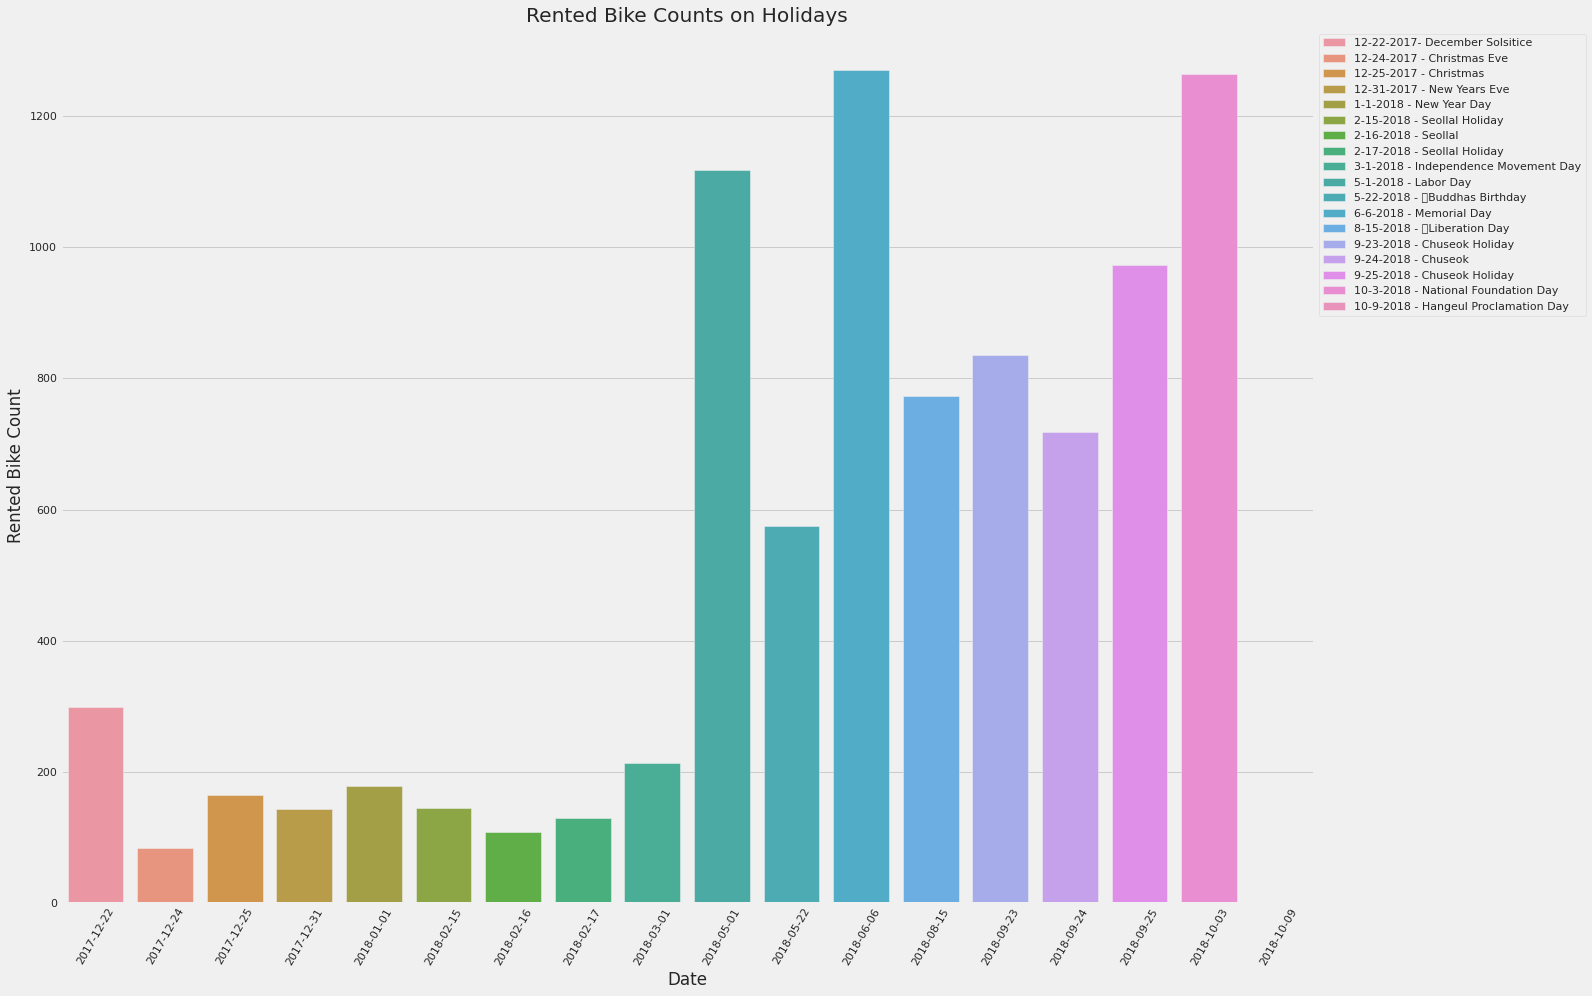

In [86]:
# plot rental bike counts on holidays
fig, ax = plt.subplots(figsize=(20, 15))
g = sns.barplot(x = 'Date', y = 'Rented Bike Count', data = holidayBike, ci = None, hue = 'Date', dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
# plt.legend(labels=['12-22-2017- December Solsitice', '12-24-2017 - Christmas Eve', '12-25-2017 - Christmas', '12-31-2017 - New Years Eve', '1-1-2018 - New Year Day'], loc = 2, bbox_to_anchor = (1,1))
# plt.legend(loc = 2, bbox_to_anchor = (1,1))
ax.legend(labels=['12-22-2017- December Solsitice', '12-24-2017 - Christmas Eve', '12-25-2017 - Christmas', '12-31-2017 - New Years Eve', '1-1-2018 - New Year Day', '2-15-2018 - Seollal Holiday', '2-16-2018 - Seollal', '2-17-2018 - Seollal Holiday', '3-1-2018 - Independence Movement Day',
                  '5-1-2018 - Labor Day', '5-22-2018 - 	Buddhas Birthday', '6-6-2018 - Memorial Day', '8-15-2018 - 	Liberation Day', '9-23-2018 - Chuseok Holiday', '9-24-2018 - Chuseok', '9-25-2018 - Chuseok Holiday', '10-3-2018 - National Foundation Day', '10-9-2018 - Hangeul Proclamation Day'], loc = 2, bbox_to_anchor = (1,1))
ax.set(title = 'Rented Bike Counts on Holidays')
plt.show()

Holidays seem not to affect rental bike usage since cold weather months don't have higher rental bike counts compared to warm weather months.

In [87]:
# make dataframe for non functional days
NFBike = bike.loc[bike['Functioning Day'] == 'No']

In [88]:
# non functional day dataset
NFBike

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
3144 2018-04-11                  0     0             14.4           82   
3145 2018-04-11                  0     1             13.6           81   
3146 2018-04-11                  0     2             12.7           80   
3147 2018-04-11                  0     3             11.6           81   
3148 2018-04-11                  0     4             10.2           83   
...         ...                ...   ...              ...          ...   
8251 2018-11-09                  0    19             11.9           71   
8252 2018-11-09                  0    20             11.9           72   
8253 2018-11-09                  0    21             11.4           74   
8254 2018-11-09                  0    22             11.2           75   
8255 2018-11-09                  0    23             10.9           76   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
3144               4.6              1041                       11.3   
3145               3.6               886                       10.3   
3146               3.9               885                        9.3   
3147               3.1               687                        8.4   
3148               3.5               554                        7.4   
...                ...               ...                        ...   
8251               2.7               589                        6.7   
8252               2.5               526                        7.0   
8253               1.9               498                        6.9   
8254               1.7               478                        6.9   
8255               1.2               456                        6.8   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
3144                      0.0           0.0            0.0  Spring   
3145                      0.0           0.0            0.0  Spring   
3146                      0.0           0.0            0.0  Spring   
3147                      0.0           0.0            0.0  Spring   
3148                      0.0           0.0            0.0  Spring   
...                       ...           ...            ...     ...   
8251                      0.0           0.0            0.0  Autumn   
8252                      0.0           0.0            0.0  Autumn   
8253                      0.0           0.0            0.0  Autumn   
8254                      0.0           0.0            0.0  Autumn   
8255                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day      Time            DateTime        Day  
3144  No Holiday              No  00:00:00 2018-04-11 00:00:00  Wednesday  
3145  No Holiday              No  01:00:00 2018-04-11 01:00:00  Wednesday  
3146  No Holiday              No  02:00:00 2018-04-11 02:00:00  Wednesday  
3147  No Holiday              No  03:00:00 2018-04-11 03:00:00  Wednesday  
3148  No Holiday              No  04:00:00 2018-04-11 04:00:00  Wednesday  
...          ...             ...       ...                 ...        ...  
8251  No Holiday              No  19:00:00 2018-11-09 19:00:00     Friday  
8252  No Holiday              No  20:00:00 2018-11-09 20:00:00     Friday  
8253  No Holiday              No  21:00:00 2018-11-09 21:00:00     Friday  
8254  No Holiday              No  22:00:00 2018-11-09 22:00:00     Friday  
8255  No Holiday              No  23:00:00 2018-11-09 23:00:00     Friday  

[295 rows x 17 columns]

In [89]:
# unique non functioning days
print(NFBike['Date'].unique())

['2018-04-11T00:00:00.000000000' '2018-05-10T00:00:00.000000000'
 '2018-09-18T00:00:00.000000000' '2018-09-19T00:00:00.000000000'
 '2018-09-28T00:00:00.000000000' '2018-09-30T00:00:00.000000000'
 '2018-10-02T00:00:00.000000000' '2018-10-04T00:00:00.000000000'
 '2018-10-06T00:00:00.000000000' '2018-10-09T00:00:00.000000000'
 '2018-11-03T00:00:00.000000000' '2018-11-06T00:00:00.000000000'
 '2018-11-09T00:00:00.000000000']


In [90]:
# another dataframe with both holiday and non functioning
NF2Bike = NFBike.loc[NFBike['Holiday'] == 'Holiday']

In [91]:
# dataset with both non functional and holiday
NF2Bike

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
7488 2018-10-09                  0     0             12.6           54   
7489 2018-10-09                  0     1             12.0           58   
7490 2018-10-09                  0     2             11.4           65   
7491 2018-10-09                  0     3             11.0           66   
7492 2018-10-09                  0     4             11.0           63   
7493 2018-10-09                  0     5             10.8           64   
7494 2018-10-09                  0     6             10.8           69   
7495 2018-10-09                  0     7             10.9           70   
7496 2018-10-09                  0     8             11.4           66   
7497 2018-10-09                  0     9             12.8           57   
7498 2018-10-09                  0    10             14.8           51   
7499 2018-10-09                  0    11             16.4           45   
7500 2018-10-09                  0    12             18.3           40   
7501 2018-10-09                  0    13             19.2           39   
7502 2018-10-09                  0    14             18.8           39   
7503 2018-10-09                  0    15             18.3           40   
7504 2018-10-09                  0    16             19.0           39   
7505 2018-10-09                  0    17             18.4           39   
7506 2018-10-09                  0    18             17.7           43   
7507 2018-10-09                  0    19             17.3           47   
7508 2018-10-09                  0    20             17.0           49   
7509 2018-10-09                  0    21             16.8           52   
7510 2018-10-09                  0    22             16.7           55   
7511 2018-10-09                  0    23             16.6           53   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
7488               0.2              2000                        3.5   
7489               0.7              2000                        3.9   
7490               1.1              2000                        5.0   
7491               0.9              2000                        4.8   
7492               0.8              2000                        4.2   
7493               0.8              2000                        4.2   
7494               0.8              2000                        5.3   
7495               0.7              2000                        5.6   
7496               0.8              1991                        5.2   
7497               1.2              1838                        4.4   
7498               1.0              1998                        4.7   
7499               0.7              2000                        4.4   
7500               0.6              1995                        4.4   
7501               1.0              2000                        4.8   
7502               1.6              2000                        4.5   
7503               1.2              2000                        4.4   
7504               1.4              2000                        4.7   
7505               2.1              2000                        4.1   
7506               1.5              2000                        4.9   
7507               2.2              2000                        5.8   
7508               1.4              2000                        6.1   
7509               1.6              2000                        6.8   
7510               1.9              2000                        7.6   
7511               1.1              2000                        6.9   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  Holiday  \
7488                     0.00           0.0            0.0  Autumn  Holiday   
7489                     0.00           0.0            0.0  Autumn  Holiday   
7490                     0.00           0.0            0.0  Autumn  Holiday   
7491                     0.00           0.0            0.0  Autumn  

In [92]:
# make new dataframe with mean of rental bike count of day
holidayBike2 = holidayBike.groupby(['Date']).mean()

In [93]:
# check dataset with holiday only with mean of rental bike for entire day
holidayBike2

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
Date                                                                
2017-12-22         299.333333  11.5         2.758333    67.083333   
2017-12-24          83.916667  11.5         3.458333    82.791667   
2017-12-25         165.250000  11.5        -2.091667    43.375000   
2017-12-31         142.625000  11.5         0.087500    59.083333   
2018-01-01         178.750000  11.5        -1.283333    39.333333   
2018-02-15         145.166667  11.5        -0.450000    27.750000   
2018-02-16         108.041667  11.5        -1.087500    40.500000   
2018-02-17         129.916667  11.5        -2.891667    26.875000   
2018-03-01         213.833333  11.5         0.450000    64.208333   
2018-05-01        1117.500000  11.5        20.341667    72.791667   
2018-05-22         574.583333  11.5        18.195833    60.458333   
2018-06-06        1270.750000  11.5        23.091667    60.375000   
2018-08-15         773.541667  11.5        31.550000    59.750000   
2018-09-23         835.833333  11.5        19.412500    54.833333   
2018-09-24         719.125000  11.5        17.820833    47.458333   
2018-09-25         972.916667  11.5        17.491667    48.750000   
2018-10-03        1264.541667  11.5        17.241667    59.125000   
2018-10-09           0.000000  11.5        15.000000    52.625000   

            Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
Date                                                                        
2017-12-22          1.000000        802.750000                  -2.837500   
2017-12-24          1.825000        359.333333                   0.708333   
2017-12-25          2.700000       1916.916667                 -13.216667   
2017-12-31          2.320833       1120.291667                  -8.329167   
2018-01-01          1.454167       1894.833333                 -13.866667   
2018-02-15          2.383333       1982.750000                 -17.429167   
2018-02-16          2.091667       1877.250000                 -13.604167   
2018-02-17          2.720833       1973.333333                 -19.991667   
2018-03-01          3.554167       1084.000000                  -6.387500   
2018-05-01          1.437500        456.458333                  15.120833   
2018-05-22          1.054167       1153.041667                  12.841667   
2018-06-06          2.087500       1029.750000                  14.733333   
2018-08-15          1.116667       1909.291667                  22.229167   
2018-09-23          1.595833       1988.250000                   9.483333   
2018-09-24          2.154167       1997.666667                   5.854167   
2018-09-25          1.100000       1998.208333                   5.745833   
2018-10-03          1.200000       1853.541667                   8.362500   
2018-10-09          1.137500       1992.583333                   5.008333   

            Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
Date                                                              
2017-12-22                 0.142083      0.000000       0.320833  
2017-12-24                 0.029167      0.833333       0.000000  
2017-12-25                 0.282083      0.000000       0.000000  
2017-12-31                 0.276250      0.050000       0.595833  
2018-01-01                 0.255833      0.000000       0.000000  
2018-02-15                 0.600000      0.000000       0.000000  
2018-02-16                 0.587500      0.000000       0.000000  
2018-02-17                 0.658333      0.000000       0.000000  
2018-03-01                 0.747500      0.104167       0.000000  
2018-05-01                 0.517500      0.000000       0.000000  
2018-05-22                 0.452917      0.375000       0.000000  
2018-06-06                 1.108333      0.000000       0.000000  
2018-08-15                 0.767083      0.041667       0.000000  
2018-09-23                 0.615417      0.000000       0.000000  
2018-09-24        

In [94]:
# bike non functional day mean
NF3Bike = NFBike.groupby(['Date']).mean()

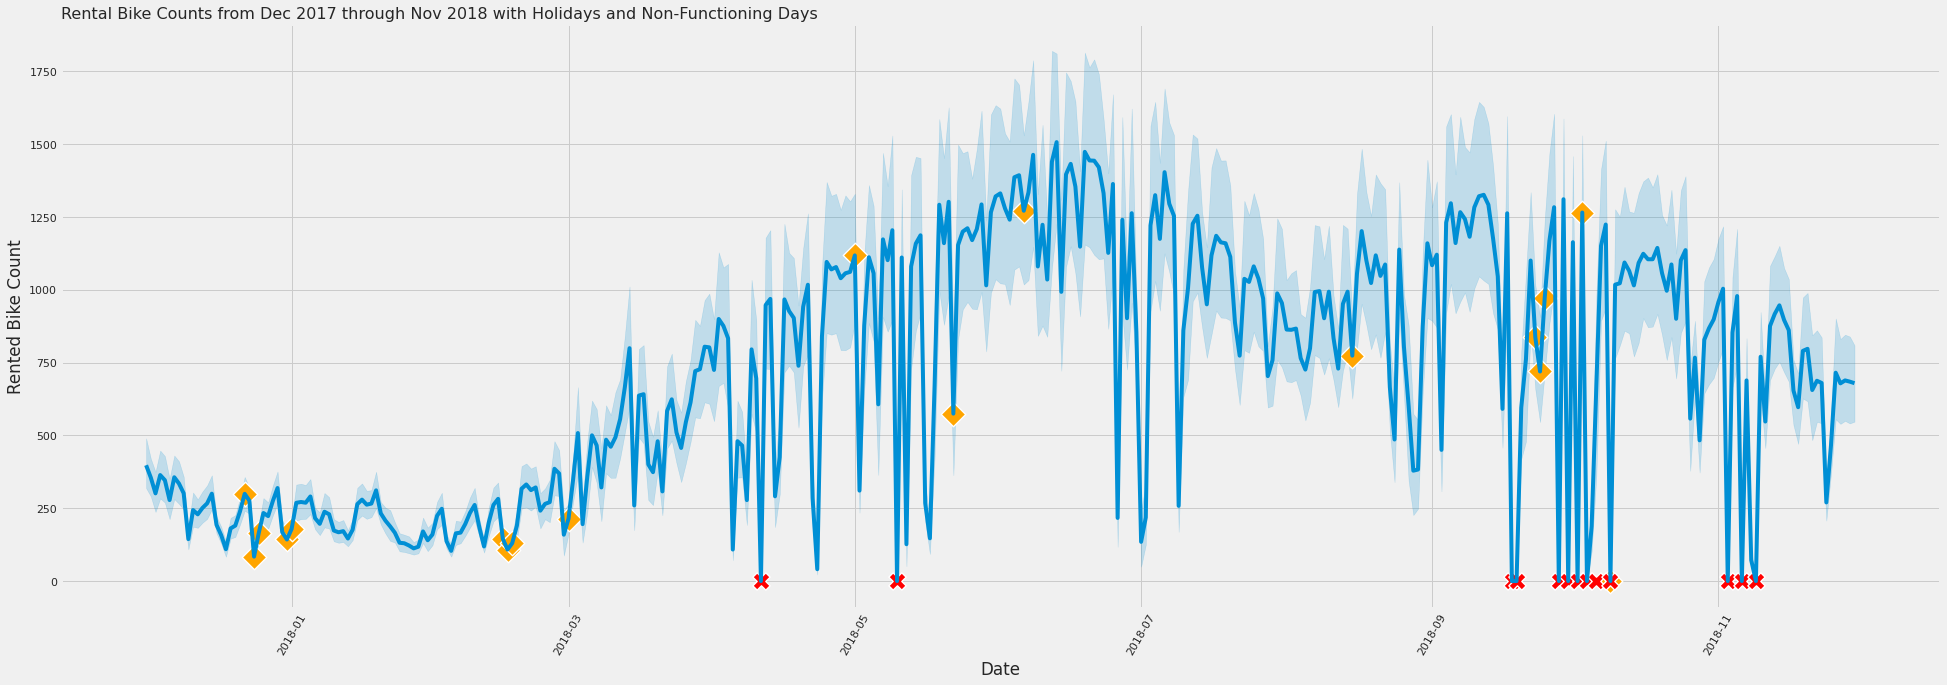

In [95]:
# lineplot with holiday and nonfunctional day
fig, ax = plt.subplots(figsize=(30, 10))
g = sns.lineplot(x='Date', y='Rented Bike Count', data = bike)
# g.xaxis.set_major_locator(ticker.LinearLocator(48))
g = sns.scatterplot(x = 'Date', y='Rented Bike Count', data = holidayBike2, marker = 'D', color = 'Orange', s = 300)
g = sns.scatterplot(x = 'Date', y='Rented Bike Count', data = NF3Bike, marker = 'X', color = 'Red', s = 300)
plt.xticks(rotation=60)
ax.set(xlabel='Date',
       ylabel='Rented Bike Count')
plt.title('Rental Bike Counts from Dec 2017 through Nov 2018 with Holidays and Non-Functioning Days', loc = 'left', fontsize = 16)
plt.show()

Orange diamonds are holidays and red X are non functional days. Holidays are variable like other days around it so it doesn't seem to affect rental bike usage. Non functional days are few mostly during October. Only October 9 is holiday and non functional day.